<h3> Midterm 2 </h3>
<p> Exam Start - Sunday 18 9 AM, Exam End - Wednesday 21 12 PM </p>

<p> Please read the following before attempting the exam </p>
* You can use this notebook as a template for your exam.
* You can use any source to answer the questions, please read through the below cells for a brief description of the dataset 
  and points split.
* You can use any library, for example, sklearn, pandas, Scipy etc.
* Do not plagiarize

<h2>Note: Please make sure your variable names for dataframes are not the same to avoid assignment errors.

Please make sure your notebook runs completely on Restart and Run without errors. </h2>


<p>Dataset</p>
* The data set is included in the assignment, it can also be downloaded from https://www.kaggle.com/rudymizrahi/airbnb-listings-in-major-us-cities-deloitte-ml
* You are required to split the data into train, validation and test sets. You can use a split that is reasonable for example 70-10-20.



<p> Question Overview </p>
* The question has two parts:
    * Regression problem: Predict the price of the listing, please note that the price is expressed in the log domain, for the visualizations to be easily understood you need to convert them to integer domain.
    * The final predictions can be in the log domain.
    * Make sure that your validation metric is reasonable i.e. For example if you are using RMSE then make sure outliers in the data (if any) are processed. This question weighs in for 60% of the test.
    * Classification problem: Predict the property_type variable. For this problem treat property_type as your y and predict it. Please make sure you treat it as your y i.e. do not include it in your training data features. This question weighs in for 40 % of the test.

<p> Mention any notes here, for example if you are using a different library like TF of Keras in your notebook. This is a place to mention any other comments you have</p>

1. I have filled in a new 'Zipcode' column using the library 'uszipcode' which takes latitude and longitude. However, since it takes 
   too long to run (Approx 1.2 hours), I decided to not include it in any analysis. (You could run and see the results are pretty close)
2. For implementation of 'Stepwise Forward Selection', I have used the libray 'mlxtend.feature_selection'. This has to be installed
   before it can be ran.
    

<p> Template for part 1 Regression problem </p>


In [1]:
# all imports go here
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)

from uszipcode import Zipcode, SearchEngine
search = SearchEngine(simple_zipcode=True)

import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import re
from sklearn import preprocessing
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import datasets, linear_model, svm
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, average_precision_score, classification_report
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as seqsel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

seed = 100

# <p> Question R - 1 (5 Points)</p>
Import data here and make changes, i.e. impute values, remove outliers if any. 
If there are not any missing, outlier, null values points will be awarded for checking them


Importing DataFrame

In [2]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [3]:
null_data_df1 = df1[df1.isnull().any(axis=1)]
null_data_df2 = df2[df2.isnull().any(axis=1)]

In [4]:
df1.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [5]:
df2.isnull().sum()

id                           0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                   79
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                 14
first_review              5436
host_has_profile_pic        55
host_identity_verified      55
host_response_rate        6306
host_since                  55
instant_bookable             0
last_review               5425
latitude                     0
longitude                    0
name                         5
neighbourhood             2465
number_of_reviews            0
review_scores_rating      5717
thumbnail_url             2859
zipcode                    321
bedrooms                    28
beds                        46
dtype: int64

In [6]:
df1.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

# FILLING NAN VALUES

In [8]:
print('Count Values in Column Bathrooms is = ', df1['bathrooms'].count())
print('Before = ',df2['bathrooms'].count())

Count Values in Column Bathrooms is =  73911
Before =  25379


In [9]:
df1['bathrooms'] = df1[['bathrooms']].fillna(value=1.0)
print('Df1 After = ',df1['bathrooms'].count())

df2['bathrooms'] = df2[['bathrooms']].fillna(value=1.0)
print('DF2 After = ',df2['bathrooms'].count())

Df1 After =  74111
DF2 After =  25458


In [10]:
print(df1['first_review'].count())
df1['first_review'] = df1[['first_review']].fillna(value='NO DATE AVAILABLE')
print(df1['first_review'].count())

print(df2['first_review'].count())
df2['first_review'] = df2[['first_review']].fillna(value='NO DATE AVAILABLE')
print(df2['first_review'].count())

58247
74111
20022
25458


In [11]:
print(df1['host_since'].count())
df1['host_since'] = df1[['host_since']].fillna(value='NO DATE AVAILABLE')
print(df1['host_since'].count())

print(df2['host_since'].count())
df2['host_since'] = df2[['host_since']].fillna(value='NO DATE AVAILABLE')
print(df2['host_since'].count())

73923
74111
25403
25458


In [12]:
print(df1['last_review'].count())
df1['last_review'] = df1[['last_review']].fillna(value='NO DATE AVAILABLE')
print(df1['last_review'].count())

print(df2['last_review'].count())
df2['last_review'] = df2[['last_review']].fillna(value='NO DATE AVAILABLE')
print(df2['last_review'].count())

58284
74111
20033
25458


In [13]:
print(df1['neighbourhood'].count())
df1['neighbourhood'] = df1[['neighbourhood']].fillna(value='Not_available')
print(df1['neighbourhood'].count())

print(df2['neighbourhood'].count())
df2['neighbourhood'] = df2[['neighbourhood']].fillna(value='Not_available')
print(df2['neighbourhood'].count())

67239
74111
22993
25458


In [14]:
print(df1['review_scores_rating'].count())
df1['review_scores_rating'] = df1[['review_scores_rating']].fillna(value=0)
print(df1['review_scores_rating'].count())

print(df2['review_scores_rating'].count())
df2['review_scores_rating'] = df2[['review_scores_rating']].fillna(value=0)
print(df2['review_scores_rating'].count())

57389
74111
19741
25458


In [15]:
print(df1['thumbnail_url'].count())
df1['thumbnail_url'] = df1[['thumbnail_url']].fillna(value='NOT AVAILABLE')
print(df1['thumbnail_url'].count())

print(df2['thumbnail_url'].count())
df2['thumbnail_url'] = df2[['thumbnail_url']].fillna(value='NOT AVAILABLE')
print(df2['thumbnail_url'].count())

65895
74111
22599
25458


In [16]:
print(df1['bedrooms'].count())
df1['bedrooms'] = df1[['bedrooms']].fillna(value=0)
print(df1['bedrooms'].count())

print(df2['bedrooms'].count())
df2['bedrooms'] = df2[['bedrooms']].fillna(value=0)
print(df2['bedrooms'].count())

74020
74111
25430
25458


In [17]:
print(df1['beds'].count())
df1['beds'] = df1[['beds']].fillna(value=0)
print(df1['beds'].count())

print(df2['beds'].count())
df2['beds'] = df2[['beds']].fillna(value=0)
print(df2['beds'].count())

73980
74111
25412
25458


In [18]:
# # print(df1['zipcode'].count())
# # df1['zipcode']
# # df1_zipcode = df1.zipcode.fillna(value=0)
# # df1_zipcode = np.array(df1_zipcode)
# # type(df1_zipcode)
# # np.unique(df1_zipcode)
# # df1_zipcode_1 = np.where(df1_zipcode/10000<1,0,df1_zipcode)
# # df1_zipcode_1
# # print(list(df1_profile_pic_1).count(1) + list(df1_profile_pic_1).count(0)) 

# res = search.by_coordinates(40.696523, -73.991616, returns = 1)
# type(res)
# res[0].zipcode

In [19]:
# df1['new_zip'] = ''
# df1.shape
# res = () 
# latitude = df1['latitude'].tolist()
# longitude = df1['longitude'].tolist()

In [20]:
# len_lat = len(latitude)
# for i in range(len_lat):
#     print(i)
#     res = search.by_coordinates(latitude[i], longitude[i], returns = 1)
#     df1['new_zip'][i]=res[0].zipcode
    

In [21]:
# col3 =  df1['new_zip'].values

print(df2['zipcode'].count())
df2['zipcode'] = df2[['zipcode']].fillna(value=0)
print(df2['zipcode'].count())

25137
25458


Some more pre-processing before we can create final dataframe by converting strings to columns

In [22]:
pro_type_1 = preprocessing.LabelBinarizer() #Calling the label binarizer function
pro_type_1.fit(df1['property_type']) #Fitting it to the column for categorical data. 
lbin = pro_type_1.transform(df1['property_type']) #Applying the transform to the column
pro_type_x = pd.DataFrame(data = lbin, columns = pro_type_1.classes_) #Creating a new DF with transformed values

lbin = pro_type_1.transform(df2['property_type']) #Applying the same transformation to test data
pro_type_y = pd.DataFrame(data = lbin, columns = pro_type_1.classes_) #Creating a new DF to call later

print(pro_type_x.shape) #print just to check if both the column sizes match for train and test
print(pro_type_y.shape)

(74111, 35)
(25458, 35)


Do this for all columns with categorical data

In [23]:
room_type_1 = preprocessing.LabelBinarizer()
room_type_1.fit(df1['room_type'])
lbin = room_type_1.transform(df1['room_type'])
room_type_x = pd.DataFrame(data = lbin, columns = room_type_1.classes_)

lbin = room_type_1.transform(df2['room_type'])
room_type_y = pd.DataFrame(data = lbin, columns = room_type_1.classes_)

print(room_type_x.shape)
print(room_type_y.shape)

(74111, 3)
(25458, 3)


In [24]:
bed_type_1 = preprocessing.LabelBinarizer()
bed_type_1.fit(df1['bed_type'])
lbin = bed_type_1.transform(df1['bed_type'])
bed_type_x = pd.DataFrame(data = lbin, columns = bed_type_1.classes_)

lbin = bed_type_1.transform(df2['bed_type'])
bed_type_y = pd.DataFrame(data = lbin, columns = bed_type_1.classes_)

print(bed_type_x.shape)
print(bed_type_y.shape)

(74111, 5)
(25458, 5)


In [25]:
cancel_type_1 = preprocessing.LabelBinarizer()
cancel_type_1.fit(df1['cancellation_policy'])
lbin = cancel_type_1.transform(df1['cancellation_policy'])
cancel_type_x = pd.DataFrame(data = lbin, columns = cancel_type_1.classes_)

lbin = cancel_type_1.transform(df2['cancellation_policy'])
cancel_type_y = pd.DataFrame(data = lbin, columns = cancel_type_1.classes_)

print(cancel_type_x.shape)
print(cancel_type_y.shape)

(74111, 5)
(25458, 5)


In [26]:
city_type_1 = preprocessing.LabelBinarizer()
city_type_1.fit(df1['city'])
lbin = city_type_1.transform(df1['city'])
city_type_x = pd.DataFrame(data = lbin, columns = city_type_1.classes_)

lbin = city_type_1.transform(df2['city'])
city_type_y = pd.DataFrame(data = lbin, columns = city_type_1.classes_)

print(city_type_x.shape)
print(city_type_y.shape)

(74111, 6)
(25458, 6)


Since the columns 'host_has_profile_pro', 'host_identity_verified' and 'instant_bookable' have values in 't' or 'f',
I converted them to np.array and manipulated using numpy.where 
The finalized columns were stored in different columns.

There maybe a better pythonic way to do this, but I was comfortable using numpy.

In [27]:
print(df1['host_has_profile_pic'].count())
df1_profile_pic = df1.host_has_profile_pic.fillna(value=0)
df1_profile_pic = np.array(df1_profile_pic)
# type(df1_profile_pic)
df1_profile_pic_1 = np.where(df1_profile_pic=='t',1,0)
print(list(df1_profile_pic_1).count(1) + list(df1_profile_pic_1).count(0))
type(df1_profile_pic_1)
df1_profile_pic_final = pd.DataFrame(df1_profile_pic_1, columns = ['host_has_profile_pic'])
type(df1_profile_pic_final)
col1 = df1_profile_pic_final['host_has_profile_pic']
#col1

print(df2['host_has_profile_pic'].count())
df2_profile_pic = df2.host_has_profile_pic.fillna(value=0)
df2_profile_pic = np.array(df2_profile_pic)
# type(df2_profile_pic)
df2_profile_pic_1 = np.where(df2_profile_pic=='t',1,0)
print(list(df2_profile_pic_1).count(1) + list(df2_profile_pic_1).count(0))
type(df2_profile_pic_1)
df2_profile_pic_final = pd.DataFrame(df2_profile_pic_1, columns = ['host_has_profile_pic'])
type(df2_profile_pic_final)
col2 = df2_profile_pic_final['host_has_profile_pic']
#col2

73923
74111
25403
25458


In [28]:
print(df1['host_identity_verified'].count())
df1_verified = df1['host_identity_verified'].fillna(value=0)
df1_verified = np.array(df1_verified)
type(df1_verified)
df1_verified_1 = np.where(df1_verified=='t',1,0)
print(list(df1_verified_1).count(1) + list(df1_verified_1).count(0))
type(df1_verified_1)
df1_verified_final = pd.DataFrame(df1_verified_1, columns = ['host_identity_verified'])
type(df1_verified_final)
col3 = df1_verified_final['host_identity_verified']
#col3

print(df2['host_identity_verified'].count())
df2_verified = df2['host_identity_verified'].fillna(value=0)
df2_verified = np.array(df2_verified)
type(df2_verified)
df2_verified_1 = np.where(df2_verified=='t',1,0)
print(list(df2_verified_1).count(1) + list(df2_verified_1).count(0))
type(df2_verified_1)
df2_verified_final = pd.DataFrame(df2_verified_1, columns = ['host_identity_verified'])
type(df2_verified_final)
col4 = df2_verified_final['host_identity_verified']
#col4

73923
74111
25403
25458


In [29]:
print(df1['instant_bookable'].count())
df1_bookable = df1.instant_bookable.fillna(value=0)
type(df1_bookable)
df1_bookable = np.array(df1_bookable)
df1_bookable_1 = np.where(df1_bookable=='t',1,0)
df1_bookable_1
df1_bookable = pd.DataFrame(df1_bookable_1, columns = ['instant_bookable'])
df1_bookable
col5 = df1_bookable['instant_bookable']
# col5

print(df2['instant_bookable'].count())
df2_bookable = df2.instant_bookable.fillna(value=0)
type(df2_bookable)
df2_bookable = np.array(df2_bookable)
df2_bookable_1 = np.where(df2_bookable=='t',1,0)
df2_bookable_1
df2_bookable = pd.DataFrame(df2_bookable_1, columns = ['instant_bookable'])
df2_bookable
col6 = df2_bookable['instant_bookable']
# col6

74111
25458


The 'host_response_rate' has values such as 100% and was dealt with using str.replace function 
This is applied to both test and train

In [30]:
print(df1['host_response_rate'].count())
df1['host_response_rate'] = df1['host_response_rate'].str.replace('%', '')
df1['host_response_rate'] = df1['host_response_rate'].fillna(value=0)
df1['host_response_rate'] = pd.to_numeric(df1['host_response_rate'])
print(df1['host_response_rate'].count())

print(df2['host_response_rate'].count())
df2['host_response_rate'] = df2['host_response_rate'].str.replace('%', '')
df2['host_response_rate'] = df2['host_response_rate'].fillna(value=0)
df2['host_response_rate'] = pd.to_numeric(df2['host_response_rate'])
print(df2['host_response_rate'].count())

55812
74111
19152
25458


In [31]:
#Concatenating all columns created above to create df which consists of repeated columns

Main_train_df = pd.concat([df1, pro_type_x, room_type_x, bed_type_x, cancel_type_x, city_type_x], axis=1)
print(Main_train_df.shape)

#Concatenating all columns created above to create df which consists of repeated columns

Main_test_df = pd.concat([df2, pro_type_y, room_type_y, bed_type_y, cancel_type_y, city_type_y], axis=1)
print(Main_test_df.shape)

(74111, 83)
(25458, 82)


# Question R - 2 (5 . 3 = 15 points)

Plot three task-relevant plots. For example, a line chart showing the trend of prices over time. 
You can use any library or plot type to a plot, but make sure it's readable i.e. proper labeling of the axis, title, and coloring.


I need to convert the column 'log_price' into anti-log('log_price')

In [32]:
train_df = Main_train_df.copy(deep = True)
test_df = Main_test_df.copy(deep = True)

In [33]:
train_df['New_price'] = 2.7**train_df.log_price     #Producing normal values instead of using log.

# PLOT for CHECKING DISTRIBUTIONS OF FEW COLUMNS

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Plot Distribution of Prices')

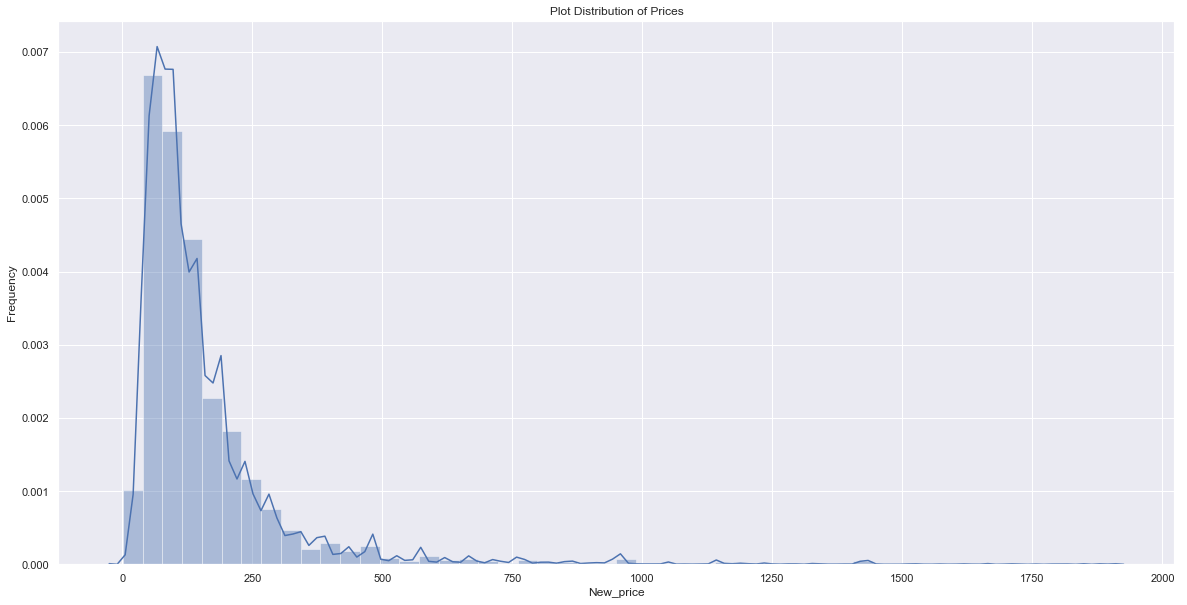

In [34]:
plt.subplots(figsize=(20,10))
sns.distplot(train_df['New_price'])
plt.ylabel('Frequency')
plt.title('Plot Distribution of Prices')

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Plot Distribution of # of occupants')

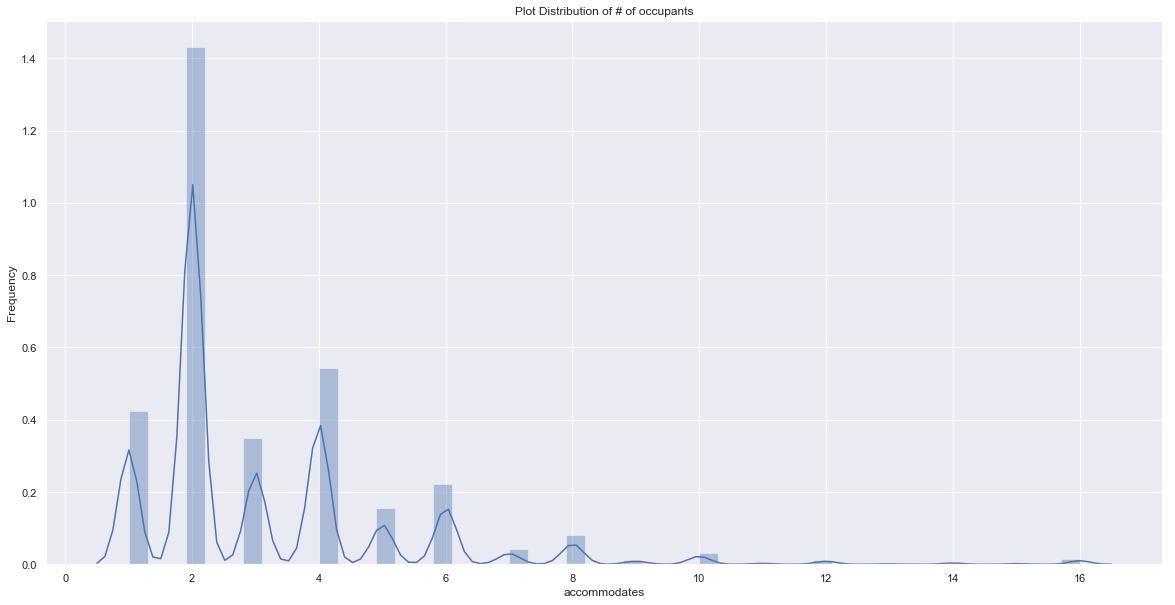

In [35]:
plt.subplots(figsize=(20,10))
sns.distplot(train_df['accommodates'])
plt.ylabel('Frequency')
plt.title('Plot Distribution of # of occupants')

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


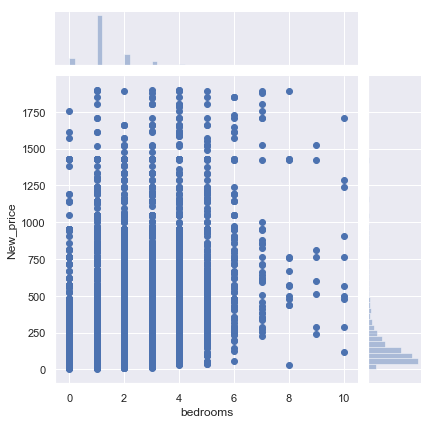

In [36]:
sns.jointplot(x = 'bedrooms', y = 'New_price', data = train_df, kind = 'scatter')

# PLOT 1: BASIC PLOTS

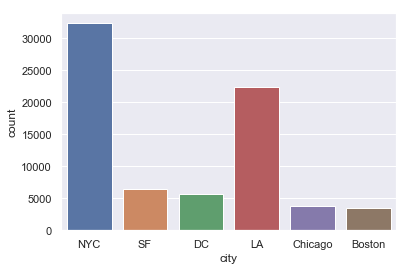

In [37]:
sns.countplot(x = 'city', data = train_df)

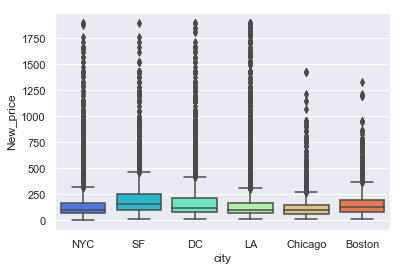

In [38]:
sns.boxplot(x = 'city', y = 'New_price', data = train_df, palette = 'rainbow')

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


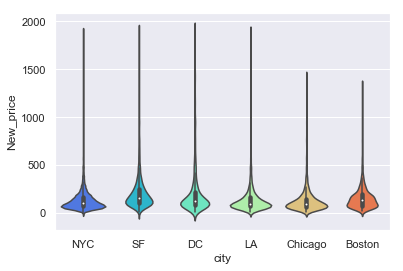

In [39]:
sns.violinplot(x = 'city', y = 'New_price', data = train_df, palette = 'rainbow')

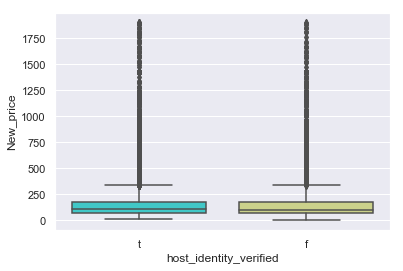

In [40]:
sns.boxplot(x = 'host_identity_verified', y = 'New_price', data = train_df, palette = 'rainbow')

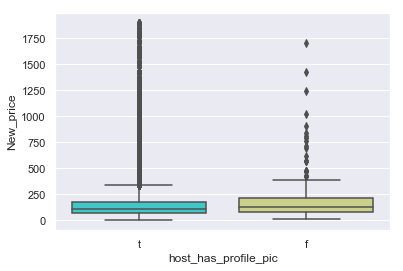

In [41]:
sns.boxplot(x = 'host_has_profile_pic', y = 'New_price', data = train_df, palette = 'rainbow')

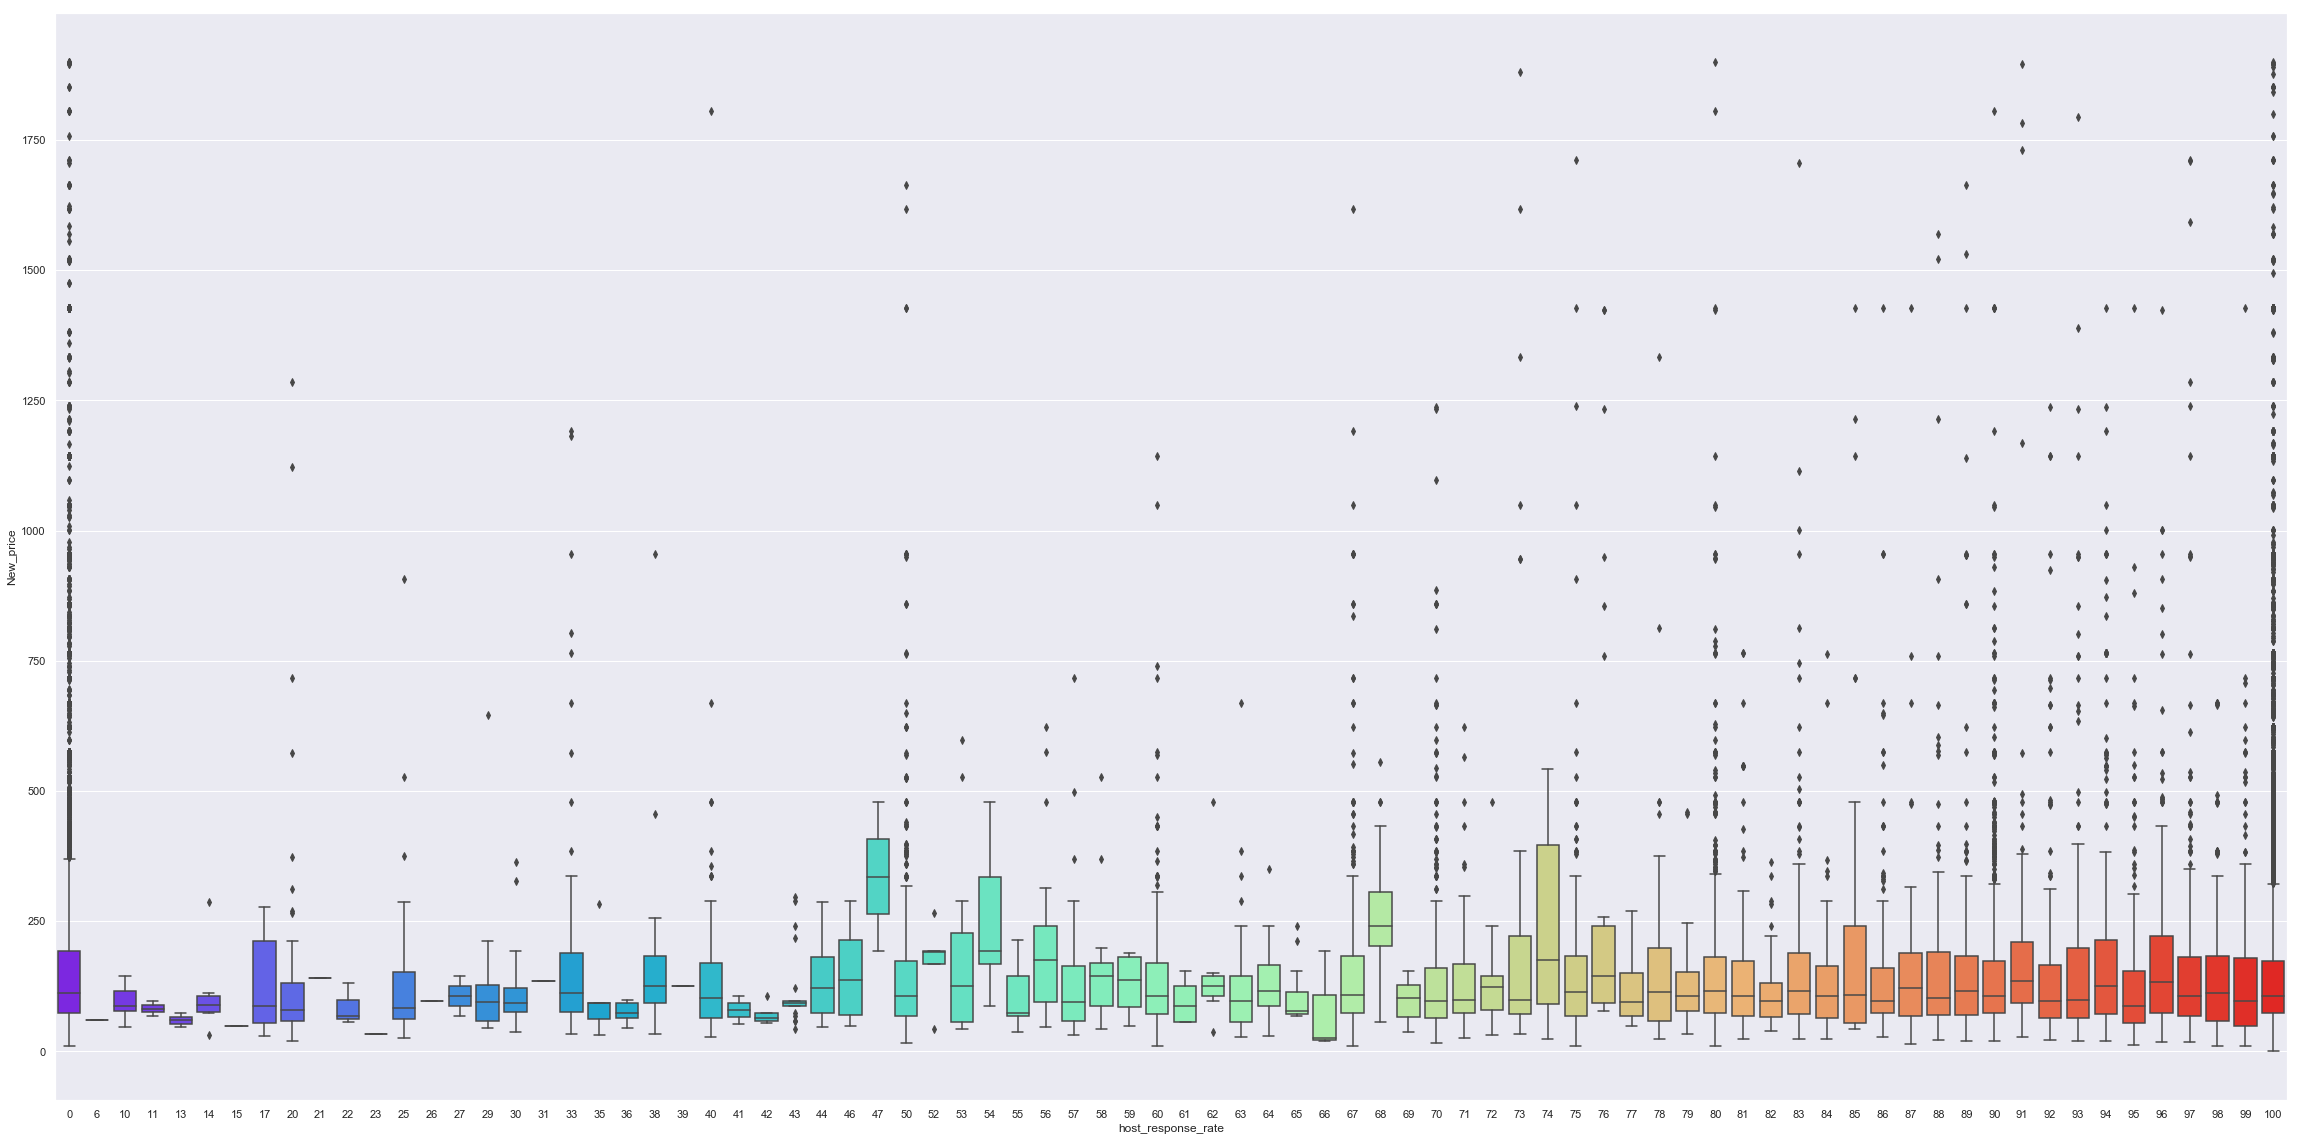

In [42]:
plt.figure(figsize=(40,20))
sns.boxplot(x = 'host_response_rate', y = 'New_price', data = train_df, palette = 'rainbow')

# PLOT 2: CO-RELATION MATRIX HEAT-PLOT

In [43]:
df1['New_price'] = 2.7**df1.log_price
df1.corr()

,id,log_price,accommodates,bathrooms,cleaning_fee,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,New_price
id,1.000000,-0.007178,-0.005759,-0.004058,-0.003059,-0.004509,-0.003021,-0.001379,0.002945,-0.004314,-0.007799,-0.009174,-0.002730
log_price,-0.007178,1.000000,0.567574,0.355174,0.111191,-0.041439,-0.002193,-0.047529,-0.032470,-0.070596,0.472422,0.441791,0.841971
accommodates,-0.005759,0.567574,1.000000,0.505490,0.182306,0.137153,-0.078309,-0.085160,0.041964,0.050873,0.708857,0.809827,0.520367
bathrooms,-0.004058,0.355174,0.505490,1.000000,0.054134,0.050717,-0.137673,-0.134777,-0.041521,-0.025847,0.589575,0.525424,0.459067
cleaning_fee,-0.003059,0.111191,0.182306,0.054134,1.000000,0.260923,-0.060913,-0.068505,0.110204,0.253140,0.105849,0.132887,0.029064
host_response_rate,-0.004509,-0.041439,0.137153,0.050717,0.260923,1.000000,-0.067653,-0.080344,0.283490,0.384242,0.058258,0.121581,-0.060993
latitude,-0.003021,-0.002193,-0.078309,-0.137673,-0.060913,-0.067653,1.000000,0.896065,-0.017642,0.018579,-0.059069,-0.079932,-0.031191
longitude,-0.001379,-0.047529,-0.085160,-0.134777,-0.068505,-0.080344,0.896065,1.000000,-0.050009,-0.003639,-0.076113,-0.081925,-0.057622
number_of_reviews,0.002945,-0.032470,0.041964,-0.041521,0.110204,0.283490,-0.017642,-0.050009,1.000000,0.294087,-0.035474,0.032126,-0.070867
review_scores_rating,-0.004314,-0.070596,0.050873,-0.025847,0.253140,0.384242,0.018579,-0.003639,0.294087,1.000000,-0.008111,0.037260,-0.128295


Ignoring the 'ID' column and the 'log_price' since we have converted it into 'New_price' column; We can see with the correlation matrix(with values) for all attributes.

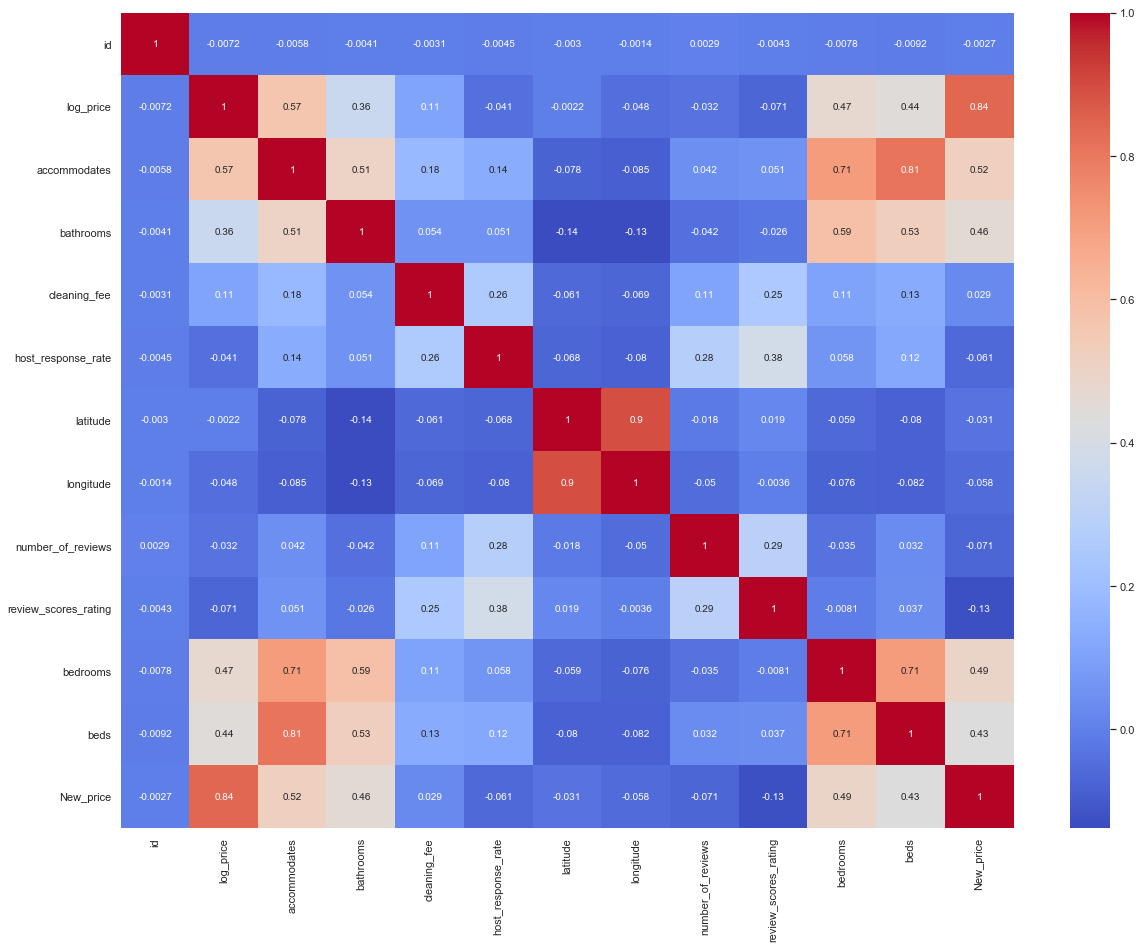

In [44]:
plt.subplots(figsize=(20,15))
sns.heatmap(df1.corr(), cmap = 'coolwarm', annot = True)

In [45]:
corr_mx = df1.corr()
corr_mx["New_price"].sort_values(ascending = False)

New_price               1.000000
log_price               0.841971
accommodates            0.520367
bedrooms                0.494599
bathrooms               0.459067
beds                    0.433480
cleaning_fee            0.029064
id                     -0.002730
latitude               -0.031191
longitude              -0.057622
host_response_rate     -0.060993
number_of_reviews      -0.070867
review_scores_rating   -0.128295
Name: New_price, dtype: float64

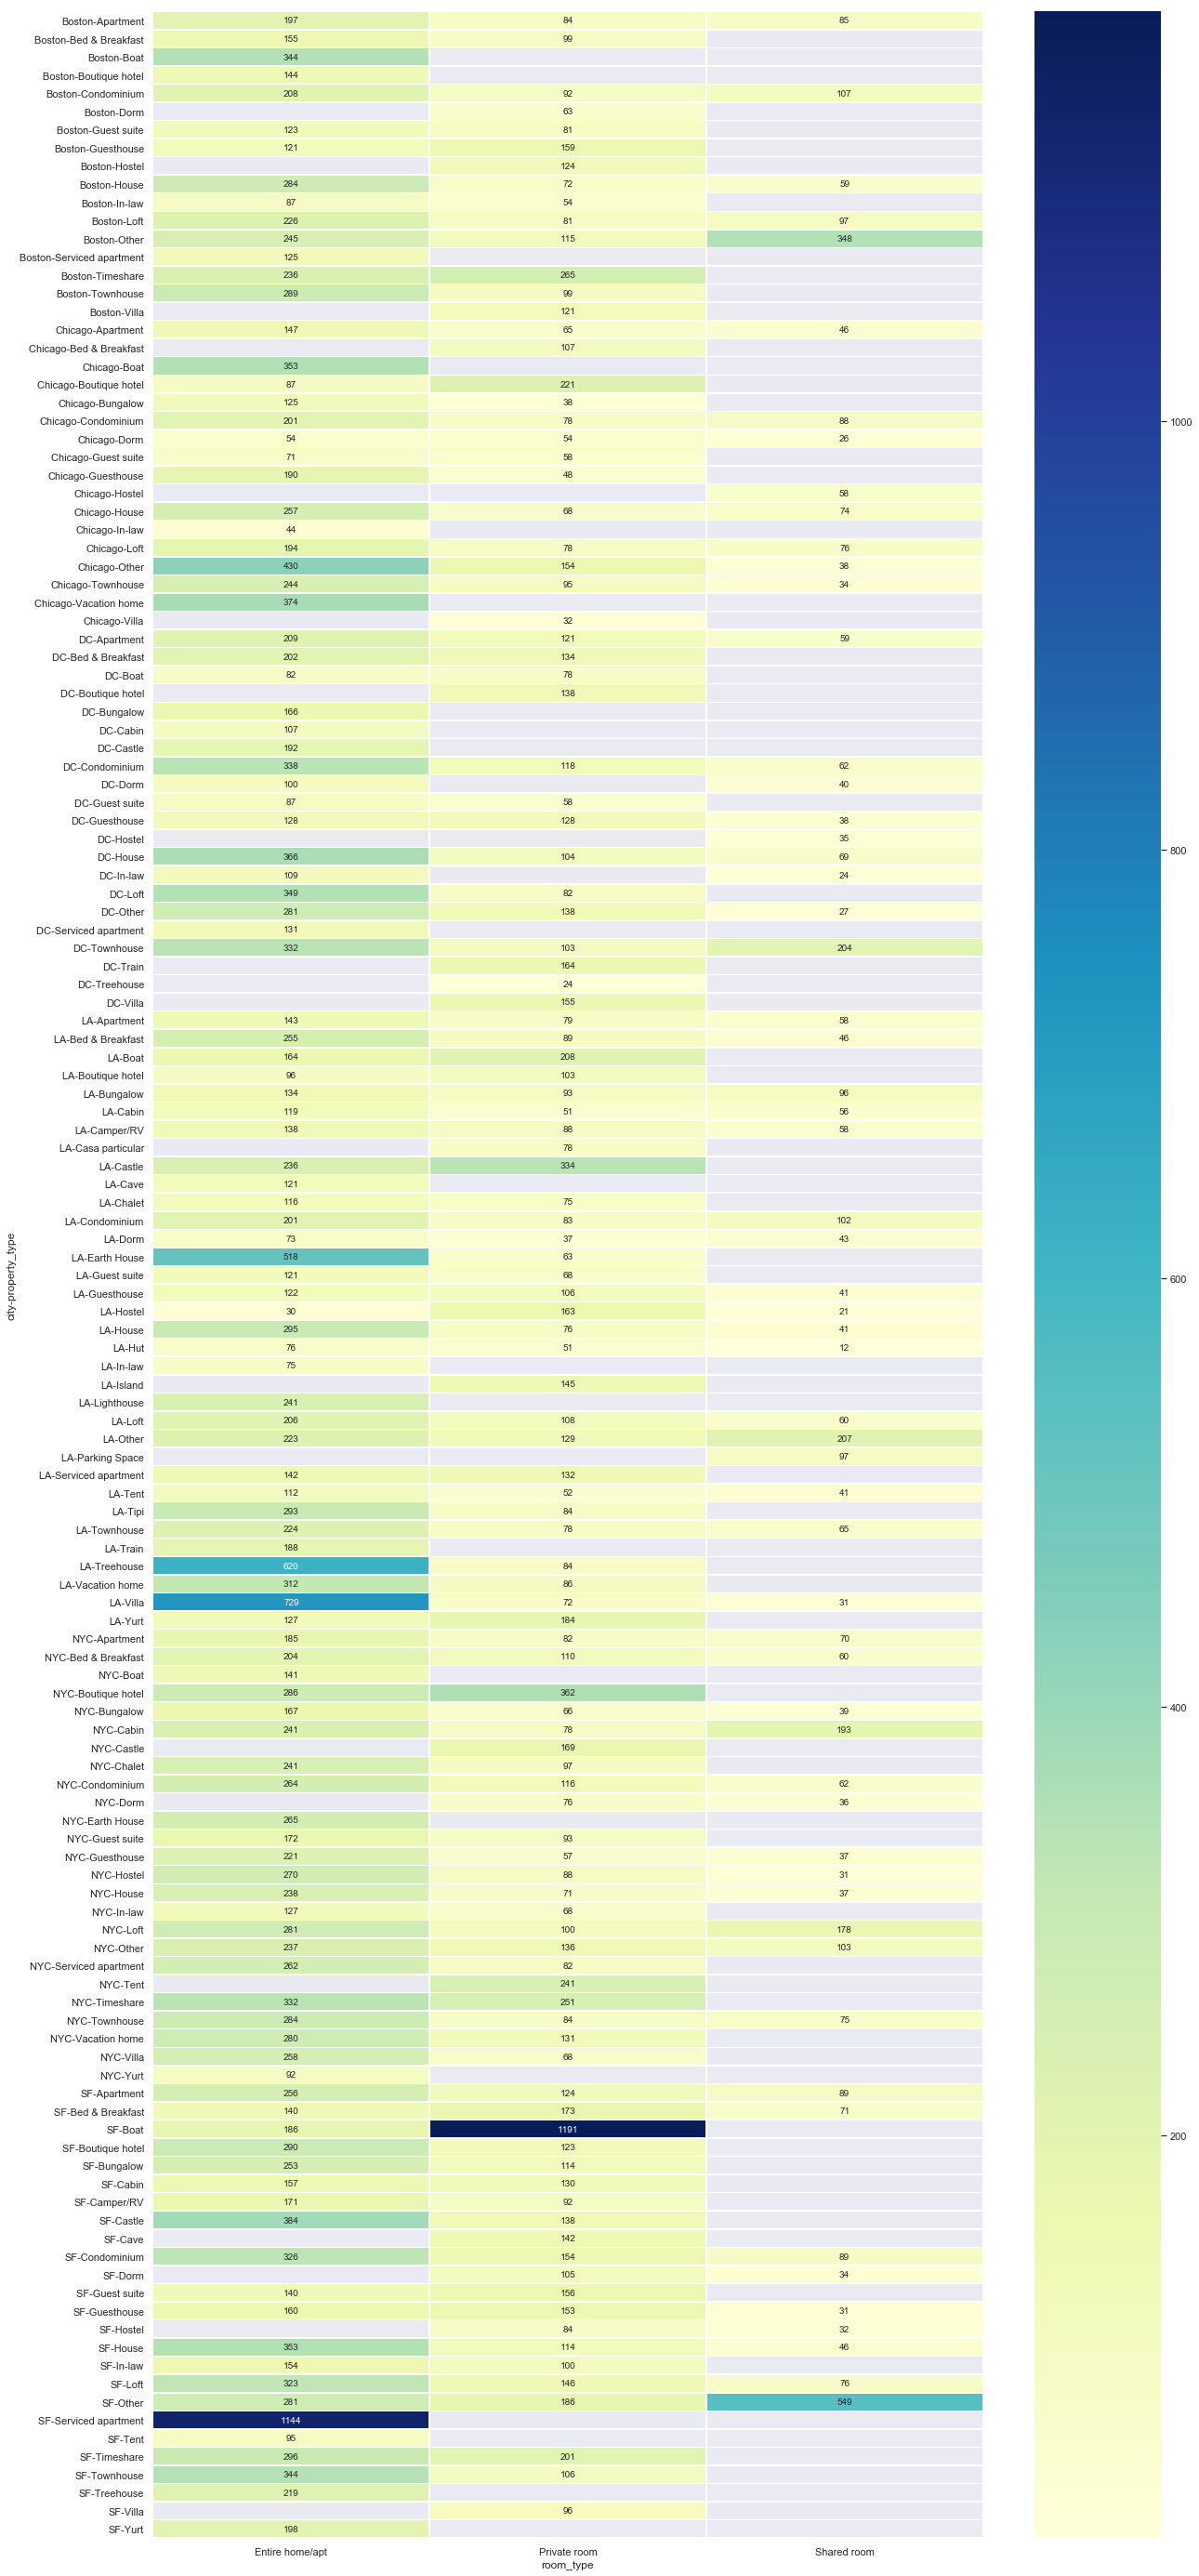

In [46]:
plt.subplots(figsize=(20,50))
sns.heatmap(df1.groupby(['city', 'property_type','room_type']).New_price.mean().unstack(),annot=True,linewidths=.5,fmt='.0f',cmap="YlGnBu")

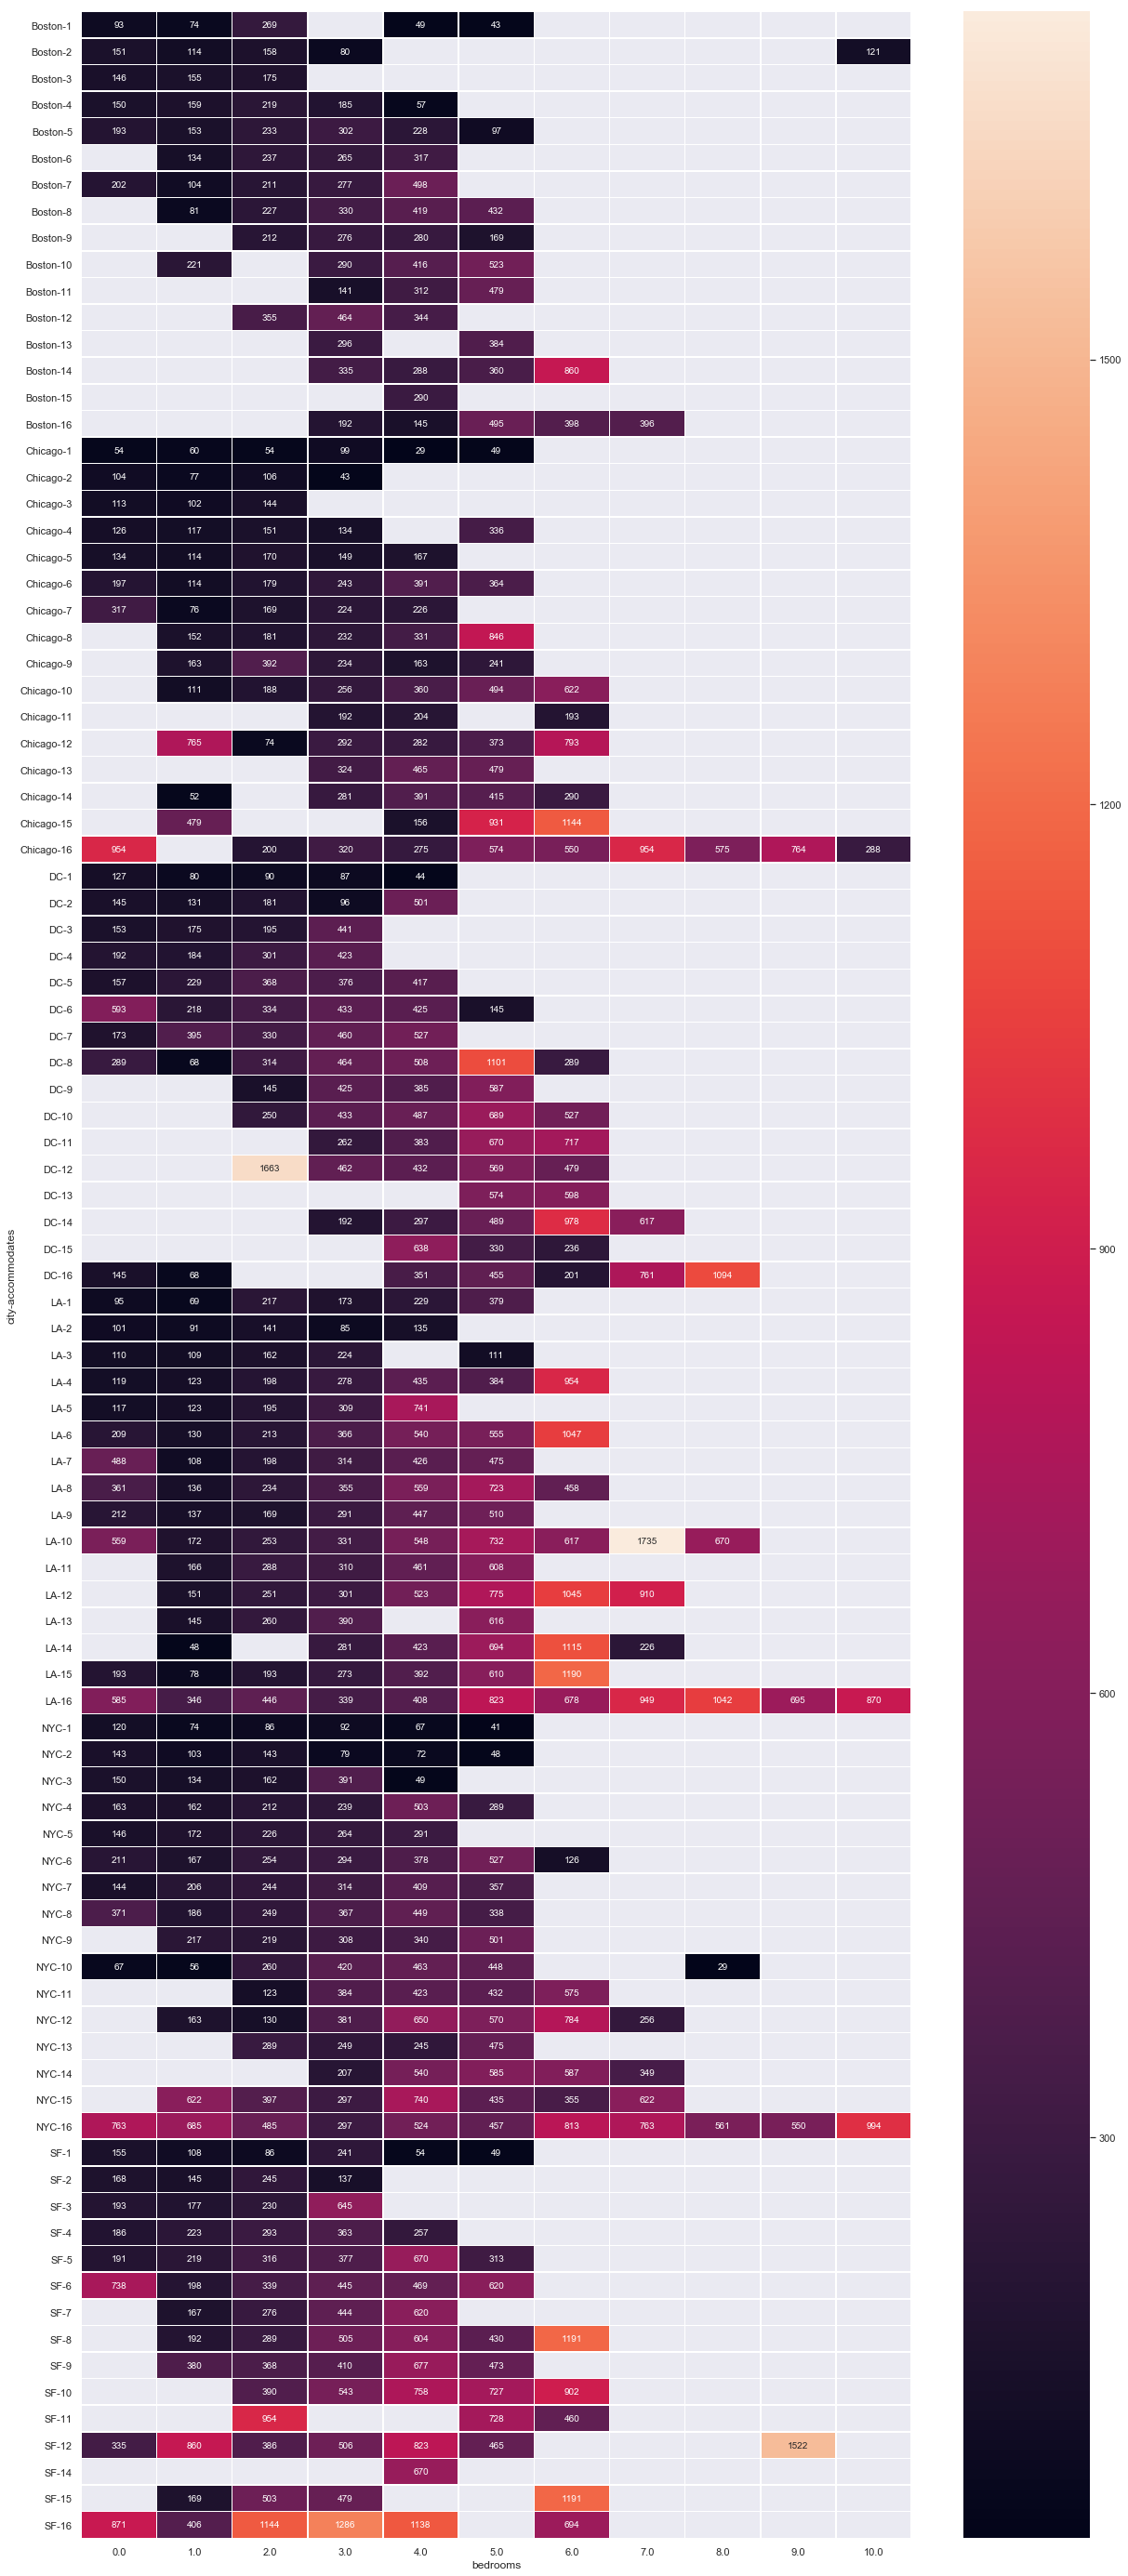

In [47]:
plt.subplots(figsize=(20,50))
sns.heatmap(df1.groupby(['city', 'accommodates','bedrooms']).New_price.mean().unstack(),annot=True,linewidths=.5,fmt='.0f')

# PLOT 3: GRID PLOTS

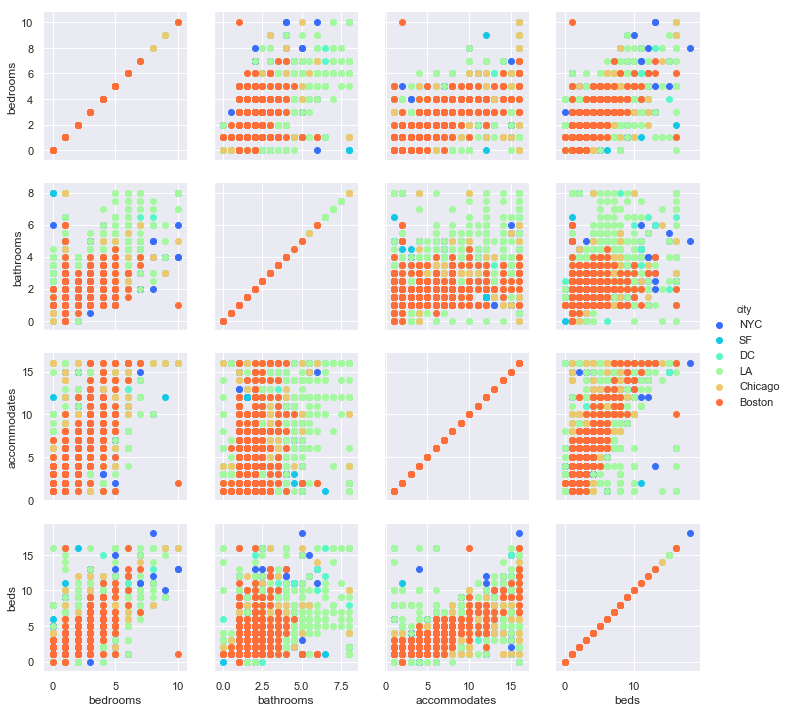

In [48]:
q1 = sns.PairGrid(train_df, hue = "city", vars = ['bedrooms', 'bathrooms', 'accommodates', 'beds'],palette = 'rainbow')
q1 = q1.map(plt.scatter)
q1 = q1.add_legend()

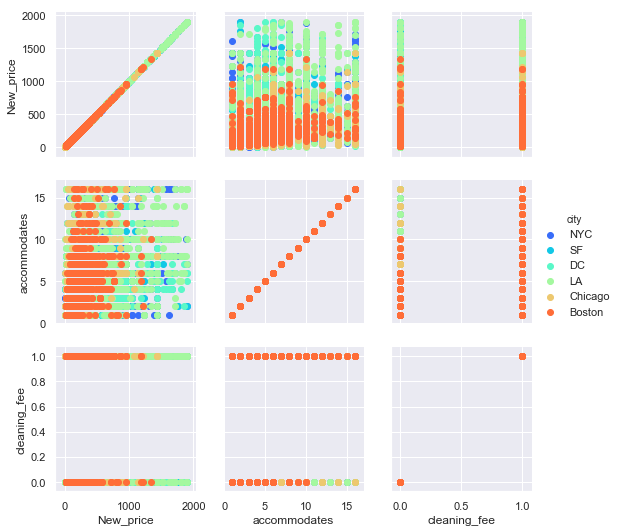

In [49]:
q2 = sns.PairGrid(train_df, hue = "city", vars = ['New_price','accommodates','cleaning_fee'],palette = 'rainbow')
q2 = q2.map(plt.scatter)
q2 = q2.add_legend()

Before I can procede further, still need to drop columns 'New_price' and 'log_price' as they should not be considered in the train df 

In [50]:
#Give different name to train_final1 for taking/considering amenities and DONt DROP amenities from the next 2 lines
# train_final1 = df1.amenities.apply(lambda x: re.sub(r'[{}""\']','',x)).str.get_dummies(sep=',')

# train_final1 = df2.amenities.apply(lambda x: re.sub(r'[{}""\']','',x)).str.get_dummies(sep=',')

ADD, DROP, CONCAT TO CREATE FINAL PROCESSED DATAFRAME

In [51]:
#Drop all the former columns which are used to create new ones.
print(train_df.shape)
train_df.drop(labels=['instant_bookable', 'property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city',
                     'amenities', 'description', 'first_review', 'host_since', 'last_review','host_identity_verified',
                      'instant_bookable', 'host_has_profile_pic', 'name', 'neighbourhood', 'thumbnail_url', 'zipcode'],
                      axis=1, inplace = True)
train_df.insert(13, 'host_has_profile_pic', col1)
train_df.insert(14, 'host_identity_verified', col3)
train_df.insert(17, 'instant_bookable', col5)
print(train_df.shape)

(74111, 84)
(74111, 70)


In [52]:
# #Drop all the former columns which are used to create new ones.
print(test_df.shape)
test_df.drop(labels=['instant_bookable', 'property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city',
                     'amenities', 'description', 'first_review', 'host_since', 'last_review','host_identity_verified',
                      'instant_bookable', 'host_has_profile_pic', 'name', 'neighbourhood', 'thumbnail_url', 'zipcode'],
                      axis=1, inplace = True)

test_df.insert(13, 'host_has_profile_pic', col2)
test_df.insert(14, 'host_identity_verified', col4)
test_df.insert(17, 'instant_bookable', col6)
print(test_df.shape)

(25458, 82)
(25458, 68)


In [53]:
train_df1 = train_df.copy(deep = True)
train_y = train_df['log_price']

train_df1.drop(labels=['log_price','New_price'], axis=1, inplace=True)
print(train_df1.shape)
train_df1.to_csv('ds2trial2.csv', encoding='utf-8',index=False)

(74111, 68)


In [54]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 68 columns):
id                        74111 non-null int64
accommodates              74111 non-null int64
bathrooms                 74111 non-null float64
cleaning_fee              74111 non-null bool
host_response_rate        74111 non-null int64
latitude                  74111 non-null float64
longitude                 74111 non-null float64
number_of_reviews         74111 non-null int64
review_scores_rating      74111 non-null float64
bedrooms                  74111 non-null float64
beds                      74111 non-null float64
Apartment                 74111 non-null int32
host_has_profile_pic      74111 non-null int32
host_identity_verified    74111 non-null int32
Bed & Breakfast           74111 non-null int32
Boat                      74111 non-null int32
instant_bookable          74111 non-null int32
Boutique hotel            74111 non-null int32
Bungalow                  74111 no

<p>Question R - 3 (5.2 =  10 points)</p>
Perform feature selection  - Attempt at least 2 feature selection approaches to select your features. 
You can select one approach for further modeling and explain why you selected it.
1. Stepwise
2. Backward elimination
3. PCA


# Question R - 3: PART 1 PCA

In [55]:
pca = PCA()      
pca.fit(train_df1)       #Using PCA to 'fit' the 'train'
pca_df = pca.transform(train_df1)   #Applying the PCA transform to train


X = pca_df
y = train_y

In [56]:
pca1_df = pca.transform(test_df)  #Applying PCA transform to test

# Question R - 3: PART 2 STEPWISE FORWARD SELECTION

In [57]:
linReg =LinearRegression()

sq = seqsel(linReg, k_features=10, forward=True, floating=False, verbose=2,scoring='neg_mean_squared_error', cv=10)
sq = sq.fit(train_df1, y)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    4.2s finished

[2018-11-21 22:45:54] Features: 1/10 -- score: -0.32784425479788004[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    9.8s finished

[2018-11-21 22:46:04] Features: 2/10 -- score: -0.2714011372422779[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:   11.5s finished

[2018-11-21 22:46:16] Features: 3/10 -- score: -0.2605735100979081[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:   15.7s finished

[2018-11-21 22:46:31] Features: 4/10 -- score: -0.2523328728183007[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed

In [58]:
sq.subsets_   #We can see the 10 most significant attributes contributing to the model.

{1: {'feature_idx': (49,),
  'cv_scores': array([-0.32803598, -0.32089543, -0.33262899, -0.33987287, -0.31942184,
         -0.31883623, -0.32268677, -0.33127088, -0.32119726, -0.34359629]),
  'avg_score': -0.32784425479788004,
  'feature_names': ('Entire home/apt',)},
 2: {'feature_idx': (9, 49),
  'cv_scores': array([-0.27403249, -0.26417033, -0.27309874, -0.27896404, -0.26353878,
         -0.26492945, -0.26825942, -0.2731805 , -0.26644657, -0.28739106]),
  'avg_score': -0.2714011372422779,
  'feature_names': ('bedrooms', 'Entire home/apt')},
 3: {'feature_idx': (9, 49, 67),
  'cv_scores': array([-0.26141173, -0.25267125, -0.26293517, -0.26730023, -0.25169745,
         -0.25450087, -0.26060247, -0.26190593, -0.25617892, -0.27653107]),
  'avg_score': -0.2605735100979081,
  'feature_names': ('bedrooms', 'Entire home/apt', 'SF')},
 4: {'feature_idx': (1, 9, 49, 67),
  'cv_scores': array([-0.25260352, -0.24431047, -0.25129969, -0.26070639, -0.24464269,
         -0.24732332, -0.25115595, -

<p> Question R - 4 (5.3 = 15 points) </p>
Modeling - Please attempt to solve the problem with at least three models with 10-fold cross validation.
1. Linear Regression
2. Ridge Regression
3. Your choice - you can use a regression model you learned in class or some other model that you think would be better.
If you are using a library other than sklearn, for example, a neural network using TensorFlow. Please mention it in the first few 
cells so that I can load it into the environment for grading.

# Question R - 4: 1.Linear Regression

In [59]:
lr_cv = KFold(n_splits=10,random_state=seed,shuffle=True)
lr_avg = 0
lr_avg1 = 0
i=1

for train, test in lr_cv.split(X,y):    
    x_train = X[train] 
    x_valid = X[test]
    y_train = y[train]
    y_valid = y[test]
    
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    prediction = lr.predict(x_valid)
    lr_r2 = lr.score(x_valid,y_valid)
    lr_avg = lr_avg + lr_r2
    print('R-Square = ',lr_r2)
    lr_mse = mean_squared_error(y_valid, prediction)
    print('lr_MSE = ',lr_mse)
    lr_avg1 = lr_avg1 + lr_mse
    i+=1
print('Average R-Squared Linear Regression = ', lr_avg/10)
print('Average MSE Linear Regression = ', lr_avg1/10)

R-Square =  0.5852717999226913
lr_MSE =  0.21157734178115847
R-Square =  0.5775310570043878
lr_MSE =  0.21494744319686315
R-Square =  -1519752.1714032039
lr_MSE =  819893.9969792903
R-Square =  0.5763108734060471
lr_MSE =  0.21610268346248607
R-Square =  0.5714298570134981
lr_MSE =  0.2125302122570803
R-Square =  0.5744674673741257
lr_MSE =  0.22024727944264363
R-Square =  0.574824264293271
lr_MSE =  0.21455697232996765
R-Square =  0.5905463271903617
lr_MSE =  0.21600962777310598
R-Square =  -19222395.19999747
lr_MSE =  9898176.087998353
R-Square =  -14013902.581616402
lr_MSE =  7242308.567050194
Average R-Squared Linear Regression =  -3475604.5902635427
Average MSE Linear Regression =  1796038.0157999396


# Question R - 4: 2.Ridge Regression

In [60]:
rr_cv1 = KFold(n_splits=10,random_state=seed,shuffle=True)
rr_avg = 0
rr_avg1 = 0
i=1
for train, test in rr_cv1.split(X,y):    
    x_train = X[train] 
    x_valid = X[test]
    y_train = y[train]
    y_valid = y[test]
    
    rr = Ridge()
    rr.fit(x_train, y_train)
    rr_prediction = rr.predict(x_valid)
    rr_r2 = rr.score(x_valid,y_valid)
    rr_avg = rr_avg + rr_r2
    print('R-Square = ',rr_r2)
    rr_mse = mean_squared_error(y_valid, rr_prediction)
    print('RR_MSE = ',rr_mse)
    rr_avg1 = rr_avg1 + rr_mse
    i+=1
print('Average R-Squared Ridge Regression = ', rr_avg/10)
print('Average MSE Ridge Regression = ', rr_avg1/10)

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.062135e-19
  overwrite_a=True).T


R-Square =  0.5751405579101962
RR_MSE =  0.21674588651369833


C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.058292e-19
  overwrite_a=True).T


R-Square =  0.5641800090146636
RR_MSE =  0.2217403061444707


C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.497345e-19
  overwrite_a=True).T


R-Square =  0.5915090474878615
RR_MSE =  0.22037741791702947


C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.055929e-19
  overwrite_a=True).T


R-Square =  0.5646261544474795
RR_MSE =  0.22206247559298226


C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.054304e-19
  overwrite_a=True).T


R-Square =  0.5597328866924236
RR_MSE =  0.21833080202233845


C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.056280e-19
  overwrite_a=True).T


R-Square =  0.563248581205296
RR_MSE =  0.2260539545323573


C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.054958e-19
  overwrite_a=True).T


R-Square =  0.5652771885461965
RR_MSE =  0.21937472530802118


C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.051618e-19
  overwrite_a=True).T


R-Square =  0.5832645637797012
RR_MSE =  0.2198511637228882


C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.046512e-19
  overwrite_a=True).T


R-Square =  0.5863793158639758
RR_MSE =  0.21298543233737177
R-Square =  0.5580333050927111
RR_MSE =  0.22840596570657457
Average R-Squared Ridge Regression =  0.5711391610040505
Average MSE Ridge Regression =  0.22059281297977323


C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.047443e-19
  overwrite_a=True).T


# Question R - 4: 3.Lasso Regression

In [61]:
cv1 = KFold(n_splits=10,random_state=seed,shuffle=True)
i=1
ls_avg = 0
ls_avg1 = 0

for train, test in cv1.split(X,y):    
    x_train = X[train] 
    x_valid = X[test]
    y_train = y[train]
    y_valid = y[test]
    
    ls = Lasso(0.00001)
    ls.fit(x_train, y_train)
    ls_prediction = ls.predict(x_valid)
    ls_r2 = ls.score(x_valid,y_valid)
    ls_avg = ls_avg + ls_r2
    print('R-Square = ',ls_r2)
    ls_mse = mean_squared_error(y_valid, ls_prediction)
    print('LS_MSE = ',ls_mse)
    ls_avg1 = ls_avg1 + ls_mse
    i+=1
print('Average R-Squared LASSO Regression = ', ls_avg/10)
print('Average MSE LASSO Regression = ', ls_avg1/10)


R-Square =  0.5853807454121992
LS_MSE =  0.2115217622544593
R-Square =  0.5772030888692155
LS_MSE =  0.21511430969267104
R-Square =  0.6025030483256133
LS_MSE =  0.21444624734323467
R-Square =  0.5760343736280193
LS_MSE =  0.21624371220327285
R-Square =  0.5714640653671156
LS_MSE =  0.2125132481526641
R-Square =  0.5742547124530607
LS_MSE =  0.22035739721028746
R-Square =  0.5750948148285171
LS_MSE =  0.21442044406922828
R-Square =  0.5909003365114486
LS_MSE =  0.21582286813030815
R-Square =  0.595268223455173
LS_MSE =  0.20840827287961253
R-Square =  0.5675710133555945
LS_MSE =  0.22347693034822377
Average R-Squared LASSO Regression =  0.5815674422205956
Average MSE LASSO Regression =  0.2152325192283962


<p> Grid Search </p>
The grid search is a technique to find the best parameters for your model. It performs an exhaustive search over the hyperparameter search space to get the best settings. You can find an example here, https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html.
Also, you can find an example here https://github.com/sourabhparime/Teaching/blob/master/Workshop%202/2_GridSearch_HyperparameterEstimation.ipynb 

<p> Question R - 6 (10 points)</p>
Tuning - From the above cell you have your best performing model. Tune it using grid search, to get the best parameters. 
As usual, you get points for grid searching, i.e. even if you find that the default hyperparameters are the best per-
forming you still get points for grid searching

In [62]:
alphas = np.logspace(-4, -0.5, 30)
r_parameters = [{'alpha': alphas}]
r_gsr = GridSearchCV(ls, r_parameters, cv=10) 
r_gsr.fit(X,y)
print("Best Hyper Parameters:\n",r_gsr.best_params_)

Best Hyper Parameters:
 {'alpha': 0.0001}


In [63]:
print('BEST SCORE USING LASSO IS = ', r_gsr.best_score_)
r_gsr.cv_results_

BEST SCORE USING LASSO IS =  0.5744240488476866


C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_a

{'mean_fit_time': array([0.14796004, 0.14040005, 0.14205999, 0.13757994, 0.14039996,
        0.13923998, 0.14492006, 0.1447    , 0.14206002, 0.13571997,
        0.13602006, 0.14508004, 0.13923998, 0.13416007, 0.13768008,
        0.13436   , 0.13416007, 0.13270001, 0.13572001, 0.13415999,
        0.12802002, 0.12947996, 0.13260007, 0.1326    , 0.13416009,
        0.13123999, 0.1444    , 0.13592005, 0.13730004, 0.13571992]),
 'std_fit_time': array([0.00813421, 0.00697652, 0.0107659 , 0.00914613, 0.00986632,
        0.01155918, 0.01934055, 0.01640446, 0.00465618, 0.00998886,
        0.00737041, 0.01521476, 0.00850077, 0.00764239, 0.00919262,
        0.00782706, 0.00764244, 0.00770516, 0.00714885, 0.01248003,
        0.00619708, 0.0071488 , 0.00780001, 0.00780003, 0.00764241,
        0.00750137, 0.02108729, 0.00730326, 0.01049775, 0.00714879]),
 'mean_score_time': array([3.12001705e-03, 3.12001705e-03, 3.12001705e-03, 1.56002045e-03,
        0.00000000e+00, 0.00000000e+00, 1.75998211e-03, 

In [64]:
r_gsr.best_params_

{'alpha': 0.0001}

<p> Question R - 7 (10 points) </p>
Predict - Split your dataset into train, test and predict the test values using your best performing model and your
best hyperparameters

In [65]:
abnb_r_train_x = pca_df      #Abnb_r_train_x is copied from pca_df which is the df which contains Binarized values from train
abnb_r_train_y = train_y     #abnb_r_train_y is copied from train_y which is the df containing columns for 'log_price'
abnb_r_test_x = pca1_df      #abnb_r_test_x is copied fromm pca1_df which is the df containing Binarized values from test

final_val = Lasso(r_gsr.best_params_['alpha']) #Passing Key 'alpha' since it is considered the best parameter to the model
final_val.fit(pca_df, train_y) 
predicted_values = final_val.predict(pca1_df) #Applying the final to predict the final values

In [66]:
predicted_values.mean()  5.026

5.026129224273672

<p> Question R - 8 </p>
Write a stepwise summary of your findings.
1. If there were any imputations executed, what were they?  (1 point)
2. You plotted three graphs. What is the insight you gained in one line? (2 points per insight.)   (2 .3  = 6 points)
3. Which feature selection method worked for you?  (1 point)
4. What was the third model you implemented?. Was it better than the required two? If yes, then why? (2 points)


IMPUTATIONS:
1.	There are several types of imputations performed. For columns with text and special characters were replaced with appropriate strings such as 'Not Available' or 'No Dates Available'. 
2.	The other numeric columns such as bathrooms or beds are replaced with the lowest number of available numeric constant. In most, cases they are replaced with ‘0’.
3.	The ‘ZipCode’ column has many variations in it. They were tricky to handle and had many different types of constants and literals. I tried replacing the entire column using .re but was unsuccessful. However, I used the ‘Latitudes and ‘Longitudes to produce the zip codes column which entirely replaces the original one with some variations in it.

GRAPHS:
1.	Basic plots of City-counts and variance, bar plots indicating mean of ‘Apartment Price’ per city. I also checked the average price of apartments if,  1. host_has_profile_pic 2.host_has_identity_verified. It is not surprising to see the results though. 
2.	Correlation heat map of all variables in the data frame. This is indicative of which attributes are closely related. For eg: Accommodates and (bedroom, beds, apartment_type are closely related)
3.	Grid Plots of ['bedrooms', 'bathrooms', 'accommodates', 'beds'] w.r.t ‘City’ gives us a good indication of distribution of all attributes with ‘City.

FEATURE SELECTION:
1. I tried to incorporate 'Amenities' column but I was unsuccessful in implementing the OHE for both the test and train df's.
1.	The feature selection used in the whole project is ‘Principal Component Analysis (PCA). This is primarily because; using PCA reduces the linear dimensionality using SVD of data to a lower dimension. I tried implementing different models using pca(0.99 or 0.8). However, it gives me the best result when the function decides to reduce by itself.
2.	I also tried implementing ‘Stepwise Forward Selection’. However, since we have many attributes after 'one hot encoding', the code was running for a long time with limited results. I printed out the first 10 most significant attributes and applied a stopping rule. I moved forward with PCA.

THIRD MODEL:
1.	The 3rd model that I implement is ‘LASSO Regression with L1 as 0.0001.
2.	It is better than linear and Ridge with accuracy improved by 2%. 
3.	I started with alpha value as 1, which was forcing the model to become completely linear and hence it had the lowest accuracy. With some trial and error, 0.0001 which would try to fit the model with lower deviations and hence more MSE. 


# Template for part 2 Classification problem

*Note: Please make sure your variable names for dataframes are not the same to avoid variable assignment errors. Please make sure your notebook runs completely on Restart and Run without errors.

# Question C - 1 (3.3 = 9 points)

Plot three task-relevant plots. For example, a line chart showing the trend of prices over time. You can use any library or plot type to a plot, but make sure it's readable i.e. proper labeling of the axis, title, and coloring.

PLOT 1: BASIC PLOTS

In [67]:
Main_train_df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,moderate,strict,super_strict_30,super_strict_60,Boston,Chicago,DC,LA,NYC,SF
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,0,1,0,0,0,0,0,0,1,0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,0,1,0,0,0,0,0,0,1,0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,1,0,0,0,0,0,0,0,1,0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,0,0,0,0,0,0,0,0,0,1
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,1,0,0,0,0,0,1,0,0,0
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,0,1,0,0,0,0,0,0,0,1
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,1,0,0,0,0,0,0,1,0,0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,1,0,0,0,0,0,0,1,0,0
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,1,0,0,0,0,0,0,0,0,1
9,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,1,0,0,0,0,0,0,1,0,0


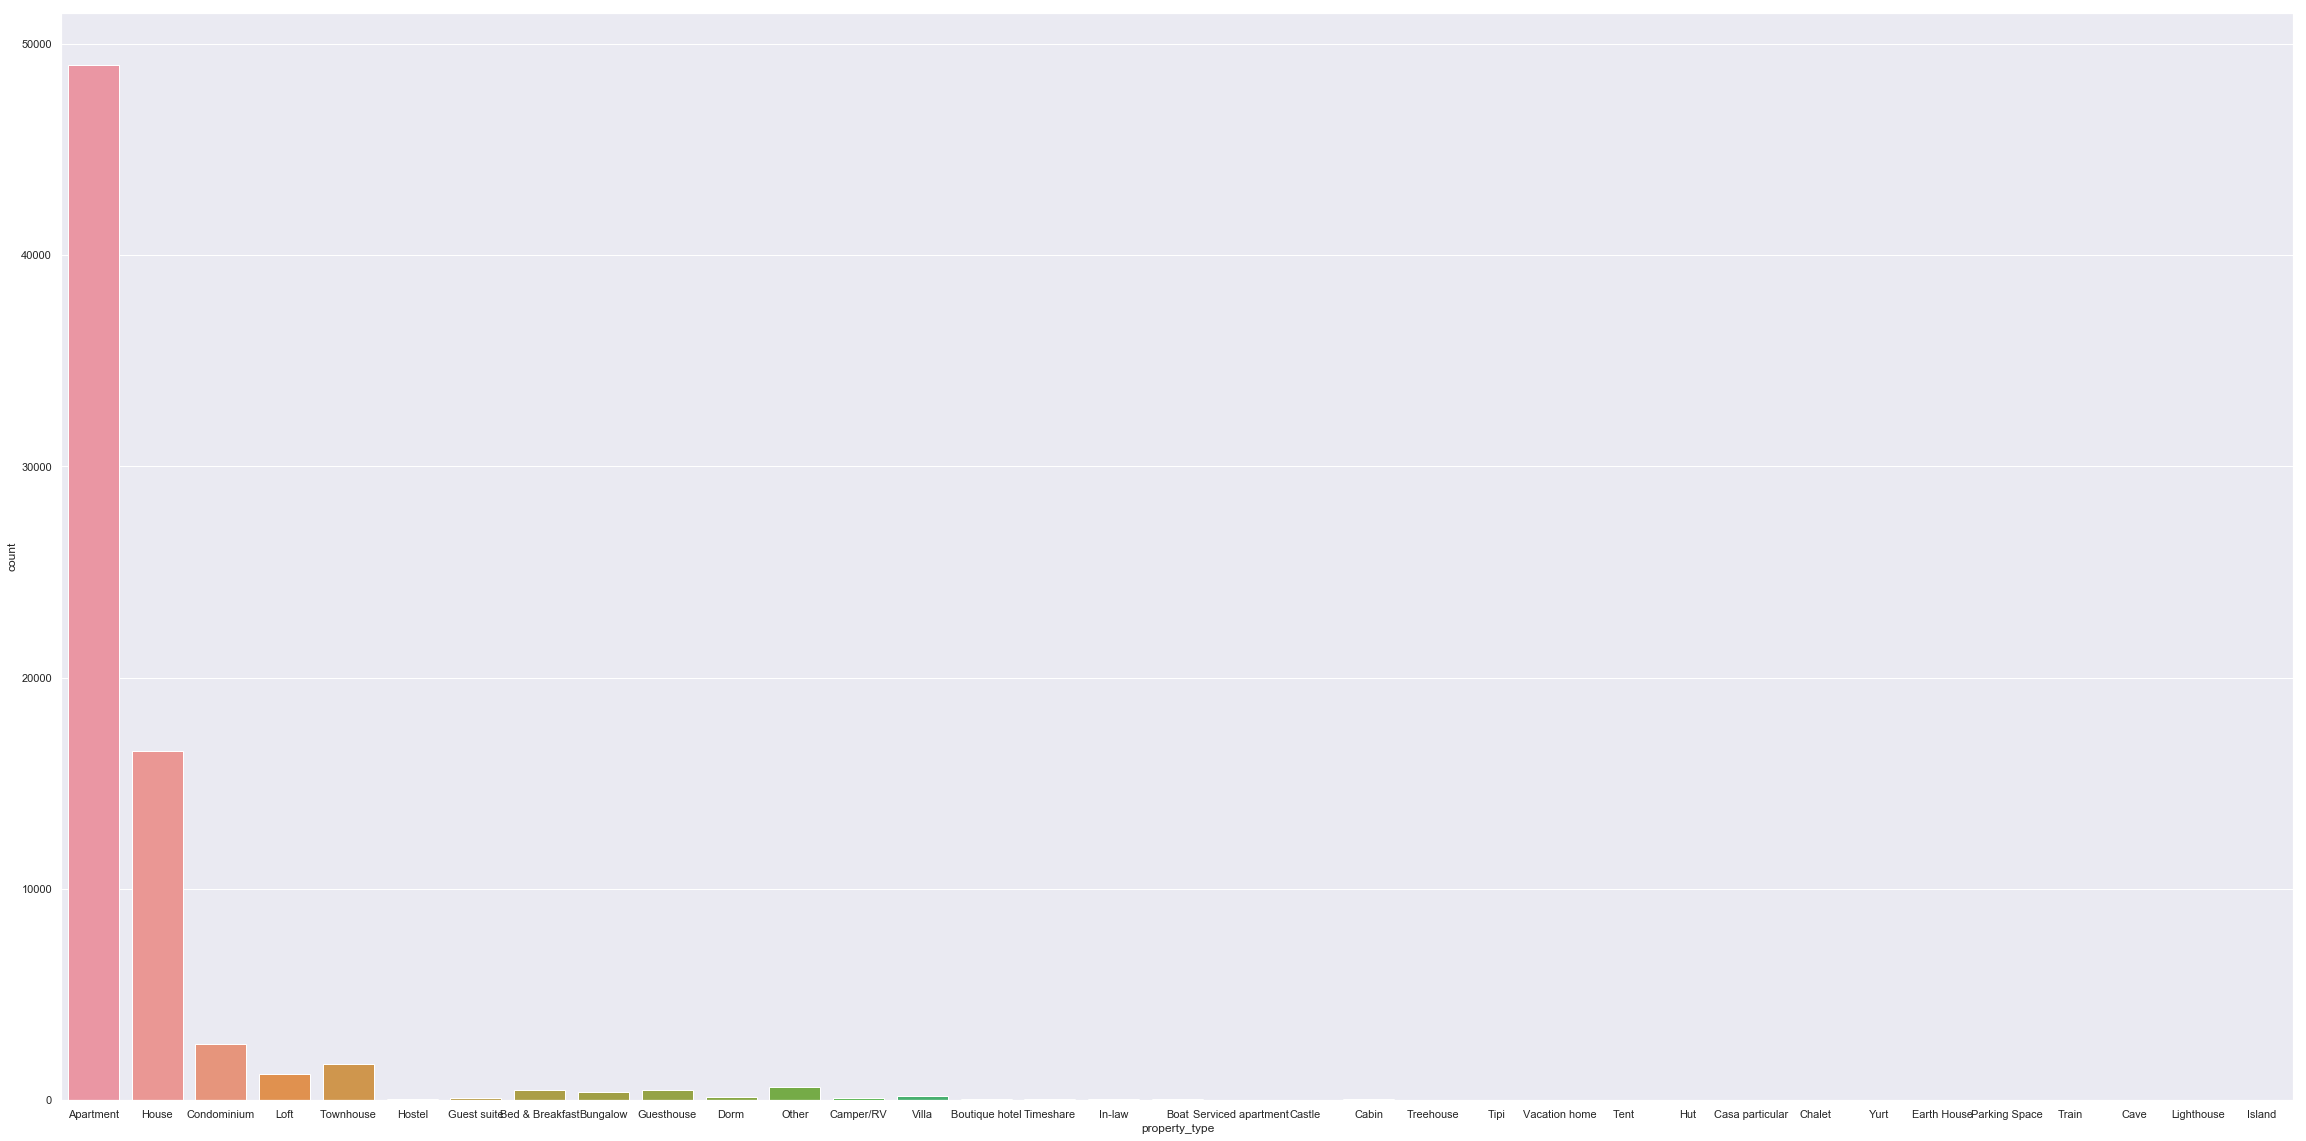

In [68]:
plt.subplots(figsize=(40,20))
c1_q1 = sns.countplot(x = 'property_type', data = Main_train_df)

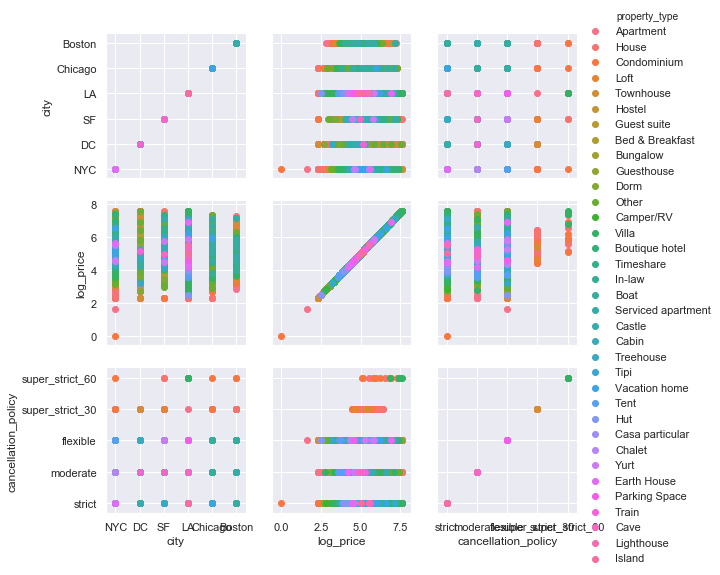

In [69]:
c2_q1 = sns.PairGrid(Main_train_df, hue = "property_type", vars = ['city', 'log_price', 'cancellation_policy'])
c2_q1 = c2_q1.map(plt.scatter)
c2_q1 = c2_q1.add_legend()

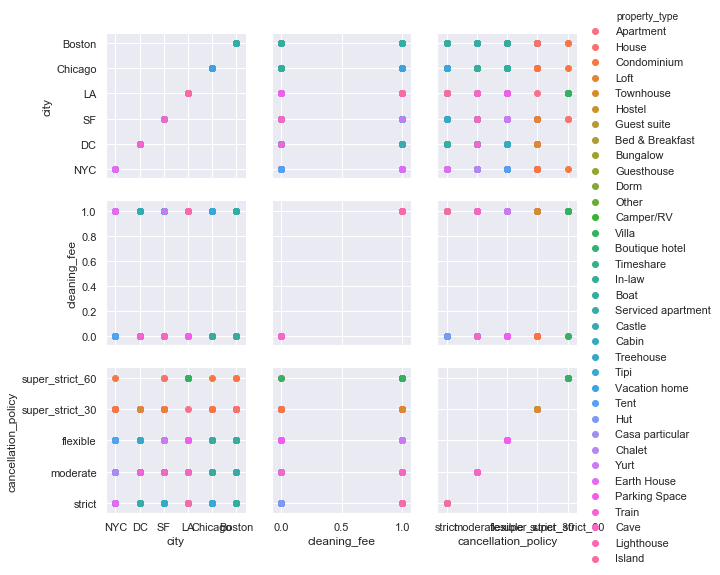

In [70]:
c3_q1 = sns.PairGrid(Main_train_df, hue = "property_type", vars = ['city', 'cleaning_fee', 'cancellation_policy'])
c3_q1 = c3_q1.map(plt.scatter)
c3_q1 = c3_q1.add_legend()

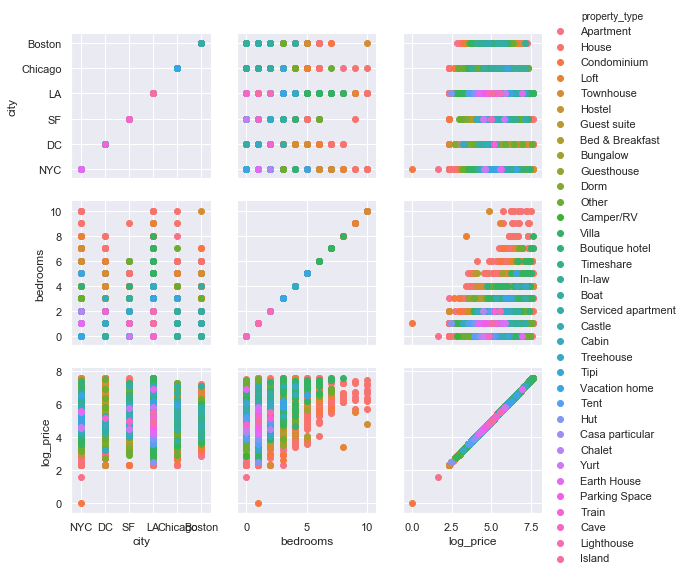

In [71]:
c4_q1 = sns.PairGrid(Main_train_df, hue = "property_type", vars = ['city', 'bedrooms','log_price'])
c4_q1 = c4_q1.map(plt.scatter)
c4_q1 = c4_q1.add_legend()

In [72]:
c_train_final = Main_train_df.copy(deep = True)
c_train_final['New_price'] = 2.7**c_train_final.log_price    #Replacing the columns with normal values instead of log
c_train_final.info()

c_train_y = c_train_final.property_type
# c_train_y 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 84 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 74111 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              74111 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        74111 non-null int64
host_since                74111 non-null object
instant_bookable          74111 non-null object
last_review               7411

In [73]:
c_test_final = Main_test_df.copy(deep = True)
c_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25458 entries, 0 to 25457
Data columns (total 82 columns):
id                        25458 non-null int64
property_type             25458 non-null object
room_type                 25458 non-null object
amenities                 25458 non-null object
accommodates              25458 non-null int64
bathrooms                 25458 non-null float64
bed_type                  25458 non-null object
cancellation_policy       25458 non-null object
cleaning_fee              25458 non-null bool
city                      25458 non-null object
description               25444 non-null object
first_review              25458 non-null object
host_has_profile_pic      25403 non-null object
host_identity_verified    25403 non-null object
host_response_rate        25458 non-null int64
host_since                25458 non-null object
instant_bookable          25458 non-null object
last_review               25458 non-null object
latitude                  25458

In [74]:
c_train_final.drop(labels = ['property_type','log_price','New_price', 'room_type', 'bed_type', 'cancellation_policy', 'city',
                     'amenities', 'first_review', 'host_since', 'last_review','host_identity_verified',
                      'instant_bookable', 'host_has_profile_pic', 'name', 'neighbourhood', 'thumbnail_url', 'zipcode'
                   ,'Apartment','Bed & Breakfast','Boat','Boutique hotel','Bungalow','Cabin','Camper/RV','Casa particular',
                   'Castle','Cave','Chalet','Condominium','Dorm','Earth House','Guest suite','Guesthouse','Hostel','House','Hut',
                   'In-law','Island' ,'Lighthouse','Loft','Other','Parking Space','Serviced apartment','Tent','Timeshare','Tipi',
                   'Townhouse','Train','Treehouse','Vacation home','Villa','Yurt'], axis=1, inplace = True)

In [75]:
c_train_final.shape

(74111, 31)

In [76]:
#Drop all the former columns which are used to create new ones.
print(train_df.shape)
c_train_final.insert(13, 'host_has_profile_pic', col1)
c_train_final.insert(14, 'host_identity_verified', col3)
c_train_final.insert(17, 'instant_bookable', col5)
print(c_train_final.shape)

(74111, 70)
(74111, 34)


In [77]:
bb = c_test_final['property_type']

In [78]:
c_test_final.drop(labels = ['property_type','instant_bookable', 'room_type', 'bed_type', 'cancellation_policy', 'city',
                     'amenities', 'first_review', 'host_since', 'last_review','host_identity_verified',
                      'instant_bookable', 'host_has_profile_pic', 'name', 'neighbourhood', 'thumbnail_url', 'zipcode'
                   ,'Apartment','Bed & Breakfast','Boat','Boutique hotel','Bungalow','Cabin','Camper/RV','Casa particular',
                   'Castle','Cave','Chalet','Condominium','Dorm','Earth House','Guest suite','Guesthouse','Hostel','House','Hut',
                   'In-law','Island' ,'Lighthouse','Loft','Other','Parking Space','Serviced apartment','Tent','Timeshare','Tipi',
                   'Townhouse','Train','Treehouse','Vacation home','Villa','Yurt'], axis=1, inplace = True)

In [79]:
# #Drop all the former columns which are used to create new ones.
print(test_df.shape)
print(c_test_final.shape)
c_test_final.insert(13, 'host_has_profile_pic', col2)
c_test_final.insert(14, 'host_identity_verified', col4)
c_test_final.insert(17, 'instant_bookable', col6)
c_test_final.fillna(value=0)
print(c_test_final.shape)

(25458, 68)
(25458, 31)
(25458, 34)


In [80]:
c_train_df_1 = c_train_final.copy(deep=True)
c_train_df_1.drop(labels=['description'], axis=1, inplace =True)
# print(c_train_final.info())
# print(c_train_df_1.info())

In [81]:
print(c_train_df_1.shape)
print(c_test_final.shape)

(74111, 33)
(25458, 34)


# CLASSIFICATION NOT USING PCA JUST TO TRY BUT COULDNT GET IT TO RUN

In [82]:
# X3 = c_train_df_1
# y3 = c_test_final

In [83]:
# knn_cv1 = KFold(n_splits=10,random_state=seed,shuffle=True)
# knn_avg1 = 0
# i=1

# for train, test in knn_cv1.split(X3,y3):    
#     x_train = X3[train] 
#     x_valid = X3[test]
#     y_train = y3[train]
#     y_valid = y3[test]
    
#     knn1 = KNeighborsClassifier(n_neighbors=100)
#     knn1.fit(x_train, y_train)
#     knn_prediction1 = knn1.predict(x_valid)
#     knn1_r2 = knn1.score(x_valid,y_valid)
#     knn_avg1 = knn_avg1 + knn1_r2
#     print('R-Square for KNN = ',knn1_r2)
#     i+=1
# print('Average R-Square score for KNN = ', knn1_avg/10)

# PCA for Classification

In [84]:
c_pca = PCA()
c_pca.fit(c_train_df_1)
c_pca_df = c_pca.transform(c_train_df_1)

X1 = c_pca_df
y1 = c_train_y

<p> Question C - 2 (5 * 3 = 15 points)</p>
Modeling - Please attempt to solve the problem with at least three models with 10-fold cross validation -5 points
1. Logistic Regression
2. KNN
3. SVM

# 1. K-Nearest Neighbour (KNN) Classifier using PCA

In [85]:
knn_cv = KFold(n_splits=10,random_state=seed,shuffle=True)
knn_avg = 0
i=1

for train, test in knn_cv.split(X1,y1):    
    x_train = X1[train] 
    x_valid = X1[test]
    y_train = y1[train]
    y_valid = y1[test]
    
    knn = KNeighborsClassifier(n_neighbors=500)
    knn.fit(x_train, y_train)
    knn_prediction = knn.predict(x_valid)
    knn_r2 = knn.score(x_valid,y_valid)
    knn_avg = knn_avg + knn_r2
    print('Accuracy Score for KNN = ',knn_r2)
    i+=1
print('Average Accuracy score for KNN = ', knn_avg/10)

Accuracy Score for KNN =  0.664328116567728
Accuracy Score for KNN =  0.6586155714478478
Accuracy Score for KNN =  0.6564566185400081
Accuracy Score for KNN =  0.6667116448522467
Accuracy Score for KNN =  0.6587505060045877
Accuracy Score for KNN =  0.664147888274187
Accuracy Score for KNN =  0.664282822830927
Accuracy Score for KNN =  0.6611793280259074
Accuracy Score for KNN =  0.6603697206854675
Accuracy Score for KNN =  0.657266225880448
Average Accuracy score for KNN =  0.6612108443109357


# 2. Logistic Regression using PCA

In [86]:
log_cv = KFold(n_splits=10,random_state=seed,shuffle=True)
log_avg = 0
i=1
print(0)
for train, test in log_cv.split(X1,y1):    
    x_train = X1[train] 
    x_valid = X1[test]
    y_train = y1[train]
    y_valid = y1[test]
    
    log = LogisticRegression(C=10 ,  penalty = 'l2' ,random_state=0, solver='lbfgs', multi_class='multinomial')
    log.fit(x_train, y_train)
    log_prediction = log.predict(x_valid)
    log_r2 = log.score(x_valid,y_valid)
    log_avg = log_avg + log_r2
    print('Accuracy score for Log-Regression = ',log_r2)
    i+=1
print('Average Accuracy score for Logistic Regression = ',log_avg/10)


0
Accuracy score for Log-Regression =  0.345250944414463
Accuracy score for Log-Regression =  0.3184455539063554
Accuracy score for Log-Regression =  0.31318310619349615
Accuracy score for Log-Regression =  0.42032114424504113
Accuracy score for Log-Regression =  0.11523411145594387
Accuracy score for Log-Regression =  0.33274861692079344
Accuracy score for Log-Regression =  0.31399271353393604
Accuracy score for Log-Regression =  0.32154904871137496
Accuracy score for Log-Regression =  0.31466738631763597
Accuracy score for Log-Regression =  0.31102415328565647
Average Accuracy score for Logistic Regression =  0.31064167789846964


# 3. SUPPORT VECTOR MACHINES (SVM) using PCA

In [87]:
svm_cv = KFold(n_splits=10,random_state=seed,shuffle=True)
svm_avg = 0
i=1

for train, test in svm_cv.split(X1,y1):    
    x_train = X1[train] 
    x_valid = X1[test]
    y_train = y1[train]
    y_valid = y1[test]
    
    c_svm = svm.SVC(C=1.0, kernel='linear', degree=3, gamma=1, tol=0.001,cache_size=2000, 
                    class_weight=None, verbose=True, max_iter=1000, random_state=None)
    c_svm.fit(x_train, y_train)
    print(c_svm.fit(x_train, y_train))
    r_prediction = c_svm.predict(x_valid)
    r_r2 = c_svm.score(x_valid,y_valid)
    svm_avg = svm_avg + r_r2
    print('Accuracy Score for SVM = ',r_r2)
    i+=1
print('Average Accuracy score for SVM = ',svm_avg/10)

[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)
Accuracy Score for SVM =  0.1069886670264436
[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)
Accuracy Score for SVM =  0.23465119417082714
[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)
Accuracy Score for SVM =  0.007826204290918905
[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)
Accuracy Score for SVM =  0.14680879773309943
[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)
Accuracy Score for SVM =  0.0035082984752395087
[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)
Accuracy Score for SVM =  0.26258264741600323
[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)
Accuracy Score for SVM =  0.08109566860072864
[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)
Accuracy Score for SVM =  0.14599919039265957
[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)
Accuracy Score for SVM =  0.002158952907839698
[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)
Accuracy Score for SVM =  0.01106463365267845
Average Accuracy score for SVM =  0.10026842546664383


# TRIED LOGISTIC REGRESSION using only 'Description'

In [88]:
c_train_df_5 = c_train_final.description.fillna(value='NA')
c_train_df2 = c_train_df_5.apply(lambda x: re.sub(r'[^a-zA-Z]',' ',str(x)))

In [89]:
vectorizer = TfidfVectorizer(stop_words ='english',lowercase = True, min_df= 100)
vectorizer.fit(c_train_df2)

tf = vectorizer.transform(c_train_df2)
print(len(vectorizer.get_feature_names()))
print(tf.shape)
print(type(tf))

# svd = TruncatedSVD(1000)
# tf = svd.fit_transform(tf.todense())

tf_df = pd.DataFrame(data = tf.todense(), columns = vectorizer.get_feature_names()) #[str(x) + 'w' for x in range(0,1000)])
#c_train_df = c_train_df.drop(labels=['description'], axis=1)
c_train_df_3 = pd.concat([tf_df],axis=1)

3350
(74111, 3350)
<class 'scipy.sparse.csr.csr_matrix'>


In [90]:
X2 = c_train_df_3.values
y2 = c_train_y

In [91]:
from sklearn.metrics import precision_recall_fscore_support
tf_cv = KFold(n_splits=10,random_state=seed,shuffle=True)
tf_avg = 0
# avg1 = 0
i=1
for train, test in tf_cv.split(X1,y1):    
    x_train = X2[train] 
    x_valid = X2[test]
    y_train = y2[train]
    y_valid = y2[test]
    
    tf_model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
    tf_model.fit(x_train, y_train)
    tf_model_prediction = tf_model.predict(x_valid)
    tf_model_r2 = tf_model.score(x_valid,y_valid)
    tf_avg = tf_avg + tf_model_r2
    print('R-Square = ',tf_model_r2)
    i+=1
print('Average score using just "DESCRIPTION"', tf_avg/10)

R-Square =  0.8074743658931463
R-Square =  0.8017811361489677
R-Square =  0.8042099581702874
R-Square =  0.8039400890568075
R-Square =  0.8052894346242072
R-Square =  0.8043448927270274
R-Square =  0.8035352853865875
R-Square =  0.8054243691809473
R-Square =  0.8105518823370665
R-Square =  0.8025907434894076
Average score using just "DESCRIPTION" 0.8049142157014453


<p> Question C - 3 (6 points)</p>
Tuning - From the above cell you have your best performing model. Tune it using grid search, to get the best parameters. 
As usual, you get points for grid searching, i.e. even if you find that the default hyperparameters are the best per-
forming you still get points for grid searching

# Question C - 3.1 GRID SEARCH FOR LOG

In [92]:
param = {"C":np.logspace(-1,1,2), "penalty":["l2"]}
d_gsr = GridSearchCV(log, param, cv=10) 
d_gsr.fit(X1,y1)
print("Best Hyper Parameters for Log Regression:\n",d_gsr.best_params_)

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Best Hyper Parameters for Log Regression:
 {'C': 0.1, 'penalty': 'l2'}


In [93]:
print('THE BEST SCORE FOR GRID SEARACH USING Log Regression IS:',d_gsr.best_score_)
d_gsr.cv_results_

THE BEST SCORE FOR GRID SEARACH USING Log Regression IS: 0.3189944812510963


C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_a

{'mean_fit_time': array([2.30819993, 2.28770003]),
 'std_fit_time': array([0.15608764, 0.13940207]),
 'mean_score_time': array([0.00780008, 0.00623996]),
 'std_score_time': array([0.00780008, 0.00764236]),
 'param_C': masked_array(data=[0.1, 10.0],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2', 'l2'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1, 'penalty': 'l2'}, {'C': 10.0, 'penalty': 'l2'}],
 'split0_test_score': array([0.31408962, 0.31408962]),
 'split1_test_score': array([0.31159908, 0.31159908]),
 'split2_test_score': array([0.32870433, 0.32870433]),
 'split3_test_score': array([0.31835964, 0.31835964]),
 'split4_test_score': array([0.32024291, 0.32024291]),
 'split5_test_score': array([0.3232555, 0.3232555]),
 'split6_test_score': array([0.33252329, 0.33252329]),
 'split7_test_score': array([0.31726094, 0.31726094]),
 'split8_test_sco

# Question C - 3.2 GRID SEARCH FOR KNN

In [94]:
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
gsr = GridSearchCV(knn, parameters, cv=10) 
gsr.fit(X1,y1)
print("Best Hyper Parameters:\n",gsr.best_params_)

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Best Hyper Parameters:
 {'n_neighbors': 10}


In [95]:
print('THE BEST SCORE FOR GRID SEARACH USING KNN IS:',gsr.best_score_)
gsr.cv_results_

THE BEST SCORE FOR GRID SEARACH USING KNN IS: 0.643602164321086


C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_a

{'mean_fit_time': array([0.36943998, 0.36885998, 0.36689997, 0.37756007, 0.36574001,
        0.39199991, 0.37665997, 0.36875994, 0.36664004, 0.37363999]),
 'std_fit_time': array([0.01066347, 0.01078992, 0.01040967, 0.01872724, 0.01025634,
        0.02479733, 0.02813118, 0.00756133, 0.01403195, 0.02297557]),
 'mean_score_time': array([0.09791999, 0.10004001, 0.10668001, 0.11093993, 0.10607996,
        0.11700001, 0.11388009, 0.11544006, 0.11544001, 0.11729996]),
 'std_score_time': array([0.00666398, 0.00748806, 0.0066424 , 0.01112695, 0.00624002,
        0.00780001, 0.00714879, 0.00764243, 0.00764237, 0.00811974]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},


# Question C - 3.3 GRID SEARCH FOR NEIGHBOURS USING LOG; But this is taking too long. Try running it!

In [96]:
# param = {"C":np.logspace(-1,1,2), "penalty":["l2"]}
# tf_gsr = GridSearchCV(tf_model, param, cv=10) 
# tf_gsr.fit(X1,y1)
# print("Best Hyper Parameters for Log Regression:\n",tf_gsr.best_params_)

In [97]:
# print('THE BEST SCORE FOR GRID SEARCH USING Log Regression IS:',tf_gsr.best_score_)
# tf_gsr.cv_results_

In [98]:
c_test_final.drop(labels=['description'], axis=1, inplace=True)

<p> Question C - 3 (5 points) </p>
Predict - Split your dataset into train, test and predict the test values using your best performing model and your
best hyperparameters

In [99]:
c_pca_df1 = c_pca.transform(c_test_final)

In [100]:
abnb_c_train_x = c_pca_df
abnb_c_test_x = c_pca_df1
abnb_c_train_y = c_train_y
abnb_c_test_y = bb 

ab = KNeighborsClassifier(n_neighbors = gsr.best_params_['n_neighbors'])
ab.fit(abnb_c_train_x, abnb_c_train_y) 
expected = bb
predicted1 = ab.predict(abnb_c_test_x)

In [101]:
ab.score(abnb_c_test_x, abnb_c_test_y)

0.6388561552360751

<p> Question C - 4 (5 points) </p>
Results - Print a confusion matrix, precision and recall

In [102]:
print(classification_report(abnb_c_test_y, predicted1))

                    precision    recall  f1-score   support

         Apartment       0.66      0.96      0.78     16672
   Bed & Breakfast       0.00      0.00      0.00       163
              Boat       0.00      0.00      0.00        22
    Boutique hotel       0.00      0.00      0.00        31
          Bungalow       0.00      0.00      0.00       117
             Cabin       0.00      0.00      0.00        19
         Camper/RV       0.00      0.00      0.00        31
            Castle       0.00      0.00      0.00         2
              Cave       0.00      0.00      0.00         1
            Chalet       0.00      0.00      0.00         1
       Condominium       0.00      0.00      0.00       951
              Dorm       0.00      0.00      0.00        61
       Earth House       0.00      0.00      0.00         4
       Guest suite       0.00      0.00      0.00        49
        Guesthouse       0.00      0.00      0.00       174
            Hostel       0.00      0.00

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [103]:
cm = confusion_matrix(abnb_c_test_y, predicted1)
print(cm)


[[16036     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0   635     0     1     0     0     0     0     0
      0     0     0     0     0     0]
 [  154     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     9     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [   22     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [   31     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [  115     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     2     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [   19     0     0     0     0     0     0     0     0     0    

CLASSIFICATION
IMPUTATIONS:
1.	For the classification part, the only difference is instead of ‘log_price’ we have to drop property type and also they have not been ONE HOT ENCODED. Everything else remains the same.
GRAPHS:
1.	The first plot indicated the # of count of every type of ‘apartment_type’. This gives us a visual of distribution of all type properties.
2.	I was trying to find co-relation between ['city', 'log_price', 'cancellation_policy'] vs ‘property_type. This also shows that ‘apartment’ is most prominent.
3.	The graph of [‘city’, ‘log_price’, ‘bedrooms’] vs property_type gives us a good visual of how the Price varies with property_type in every city.
THIRD MODEL ‘SVM’:
1.	SVM’s are usually used for data with many dimensions. Since we have 74111 X 29 times data. Even by applying SVM to train data, it may not be able to extract the subset of training points.
Even if we try to run it for an extended period of time, it may over-fit the train data. Also, we could use regularization to avoid over-fitting, but since it is time and memory intensive, it may not be the best method to proceed with.
BEST MODEL:
1.	The best model that I implemented is by using just the ‘description’ column without applying PCA or any feature reduction technique. It gives a robust accuracy of 80.49%. 
2.	The best model that I implemented is KNN (from KNN, Logistic regression and SVM) which gives a Train accuracy of 66.12% using 500 neighbors. I implemented 5, 10, 50, 100, 500, 1000 and the accuracy saturated at 500 starting from 32% to 68% for 1000 neighbors.
3.	There seems to be something off with Logistic regression as, I tried implementing it with 71% accuracy but something went wrong and I am not able to replicate it. The model implemented now has accuracy of 31.06%.
